In [1]:
from etl.users import *
from etl.transactions import *
from lib.constants import *
from lib.sql import *
from analysis.viz import *
from analysis.user_paths import *

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
users = get_users()
transactions = get_transactions()


  sql_to_df (/home/jovyan/lib/sql.py:16):
    1.073 seconds


  _join_mixpanel_stats (/home/jovyan/etl/users.py:82):
    2.464 seconds


  sql_to_df (/home/jovyan/lib/sql.py:16):
    0.215 seconds


  _join_first_order_facts (/home/jovyan/etl/users.py:95):
    1.219 seconds


  _cast_fields (/home/jovyan/etl/users.py:50):
    11.014 seconds


  get_users (/home/jovyan/etl/users.py:11):
    18.071 seconds


  sql_to_df (/home/jovyan/lib/sql.py:16):
    3.177 seconds


  coerce_types (/home/jovyan/etl/general.py:8):
    25.265 seconds


  get_transactions (/home/jovyan/etl/transactions.py:9):
    38.658 seconds



# Personas
## Common Themes
### Users are always shopping

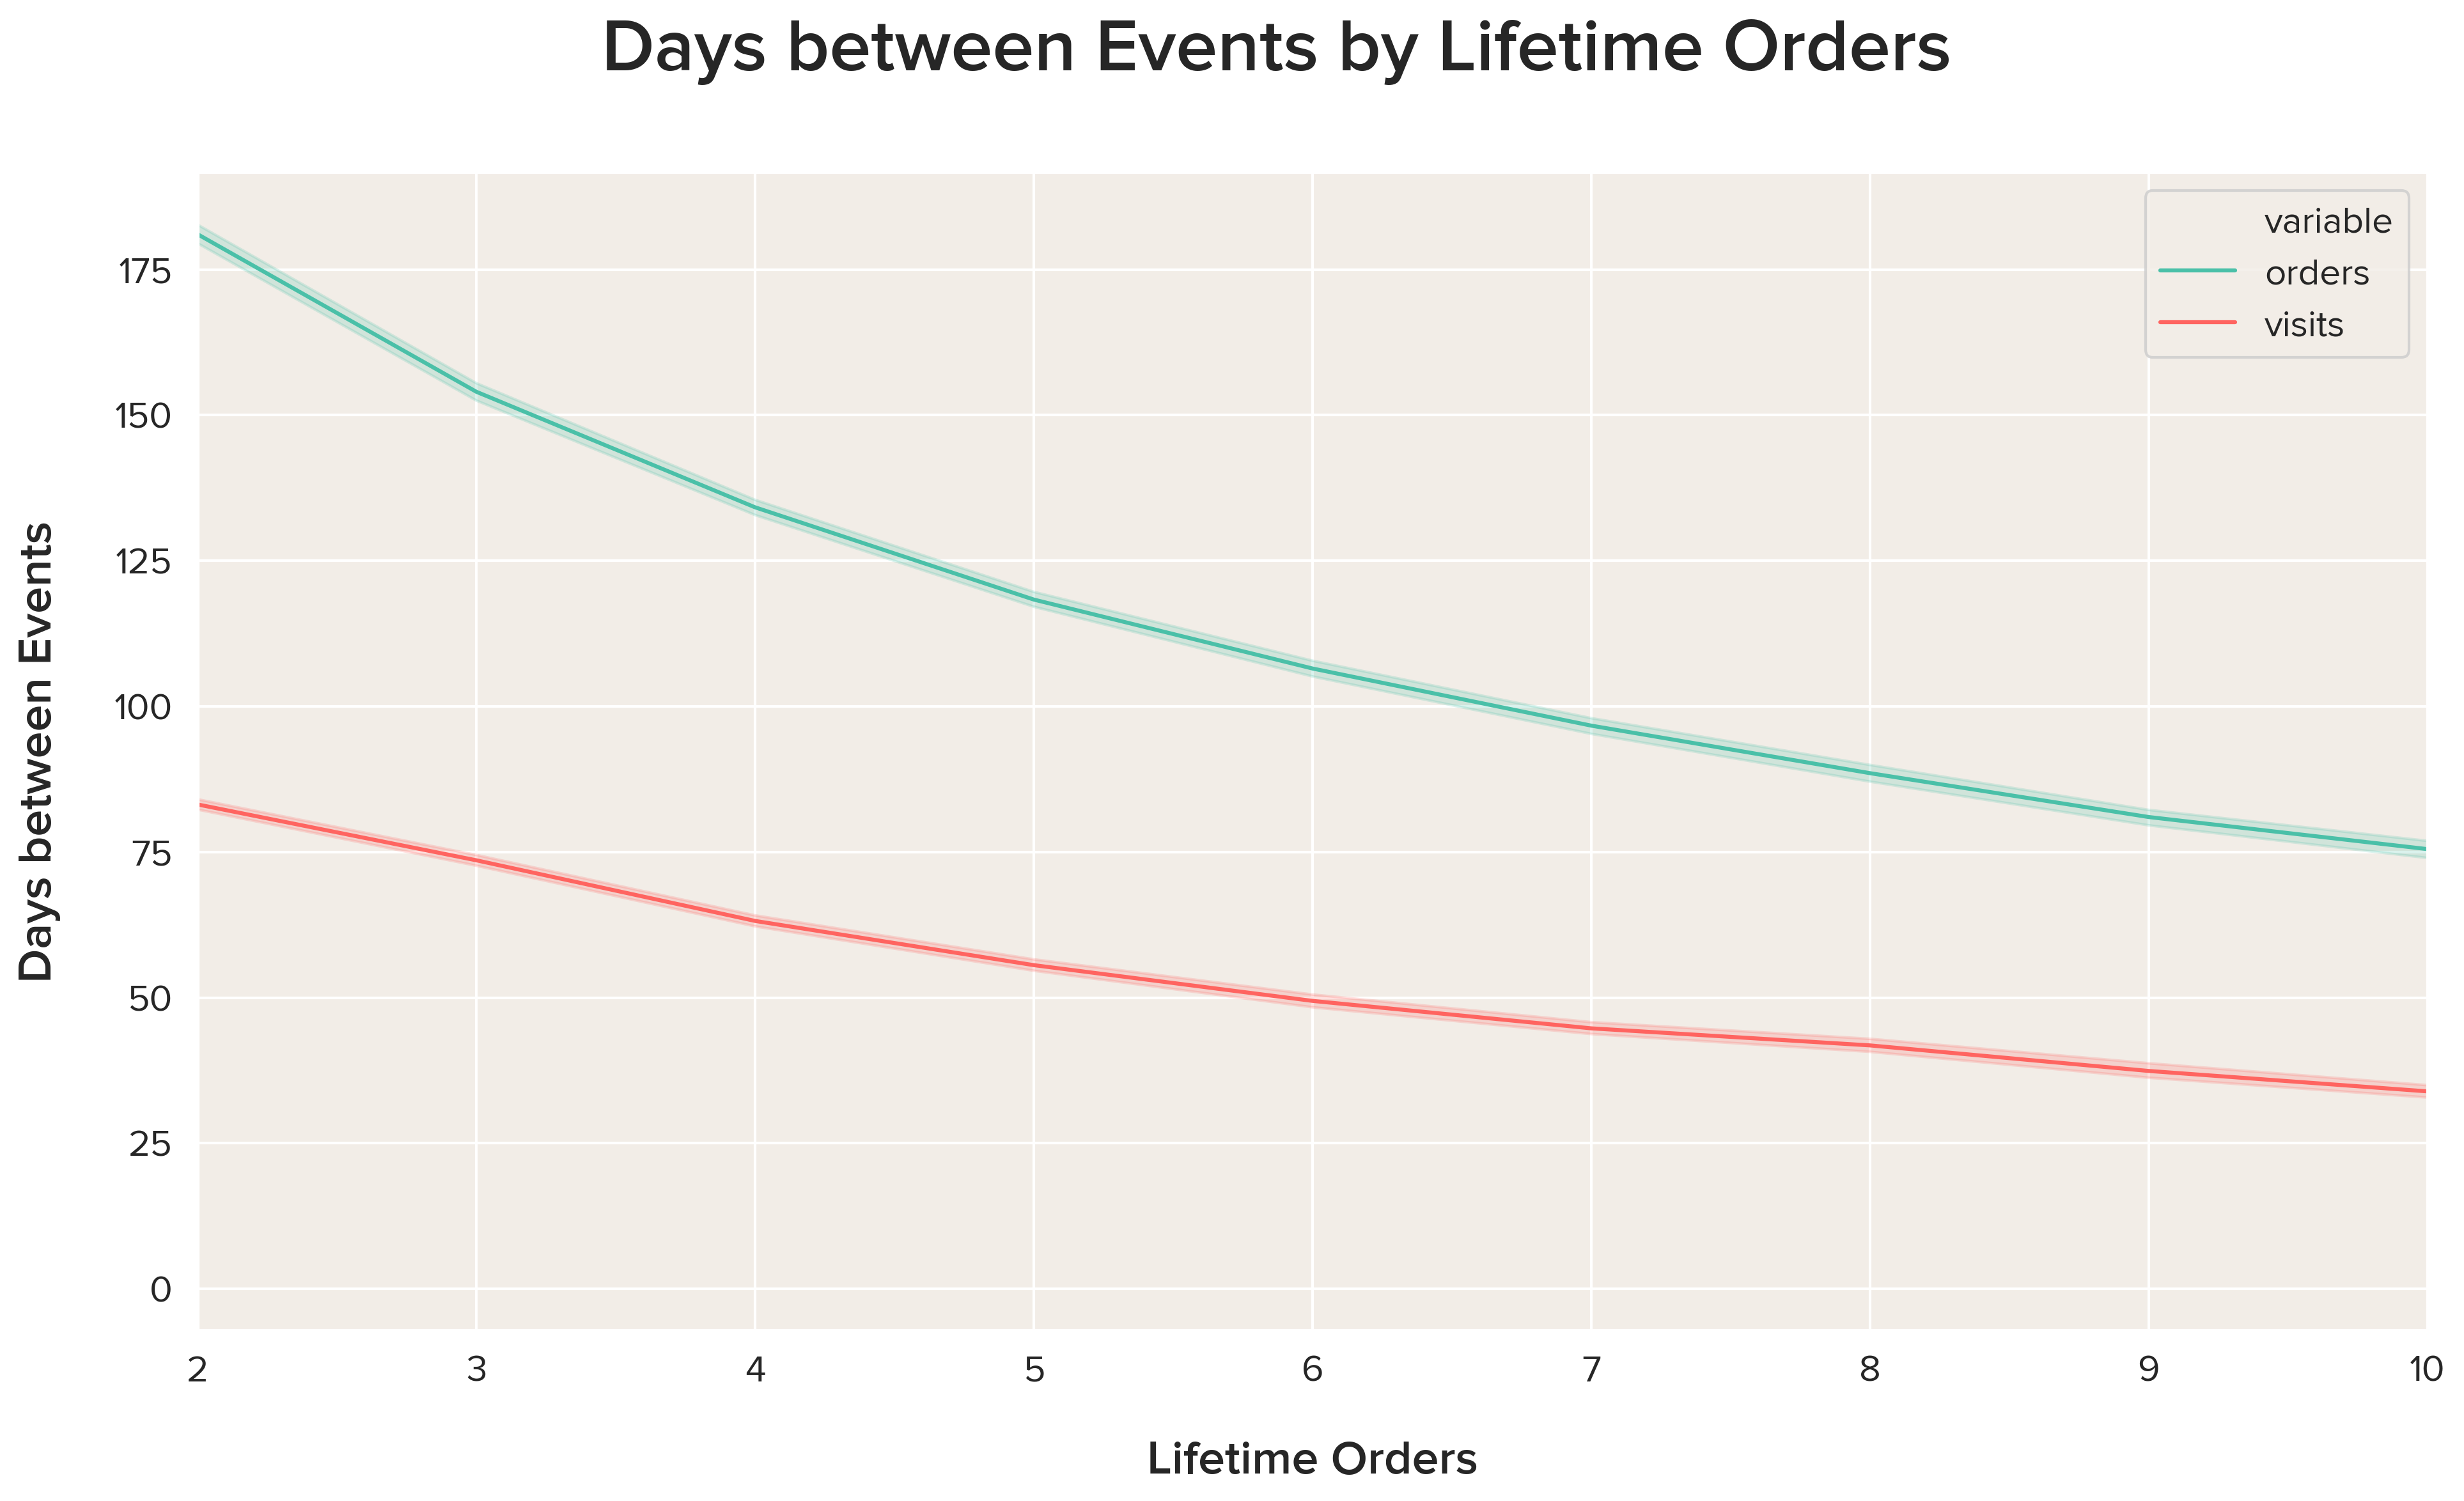

In [9]:
days_between_events_by_lifetime_orders(users)


  sql_to_df (/home/jovyan/lib/sql.py:16):
    0.024 seconds


  _rename_events (/home/jovyan/etl/events.py:32):
    0.008 seconds


  coerce_types (/home/jovyan/etl/general.py:8):
    0.006 seconds


  get_events (/home/jovyan/etl/events.py:9):
    0.042 seconds



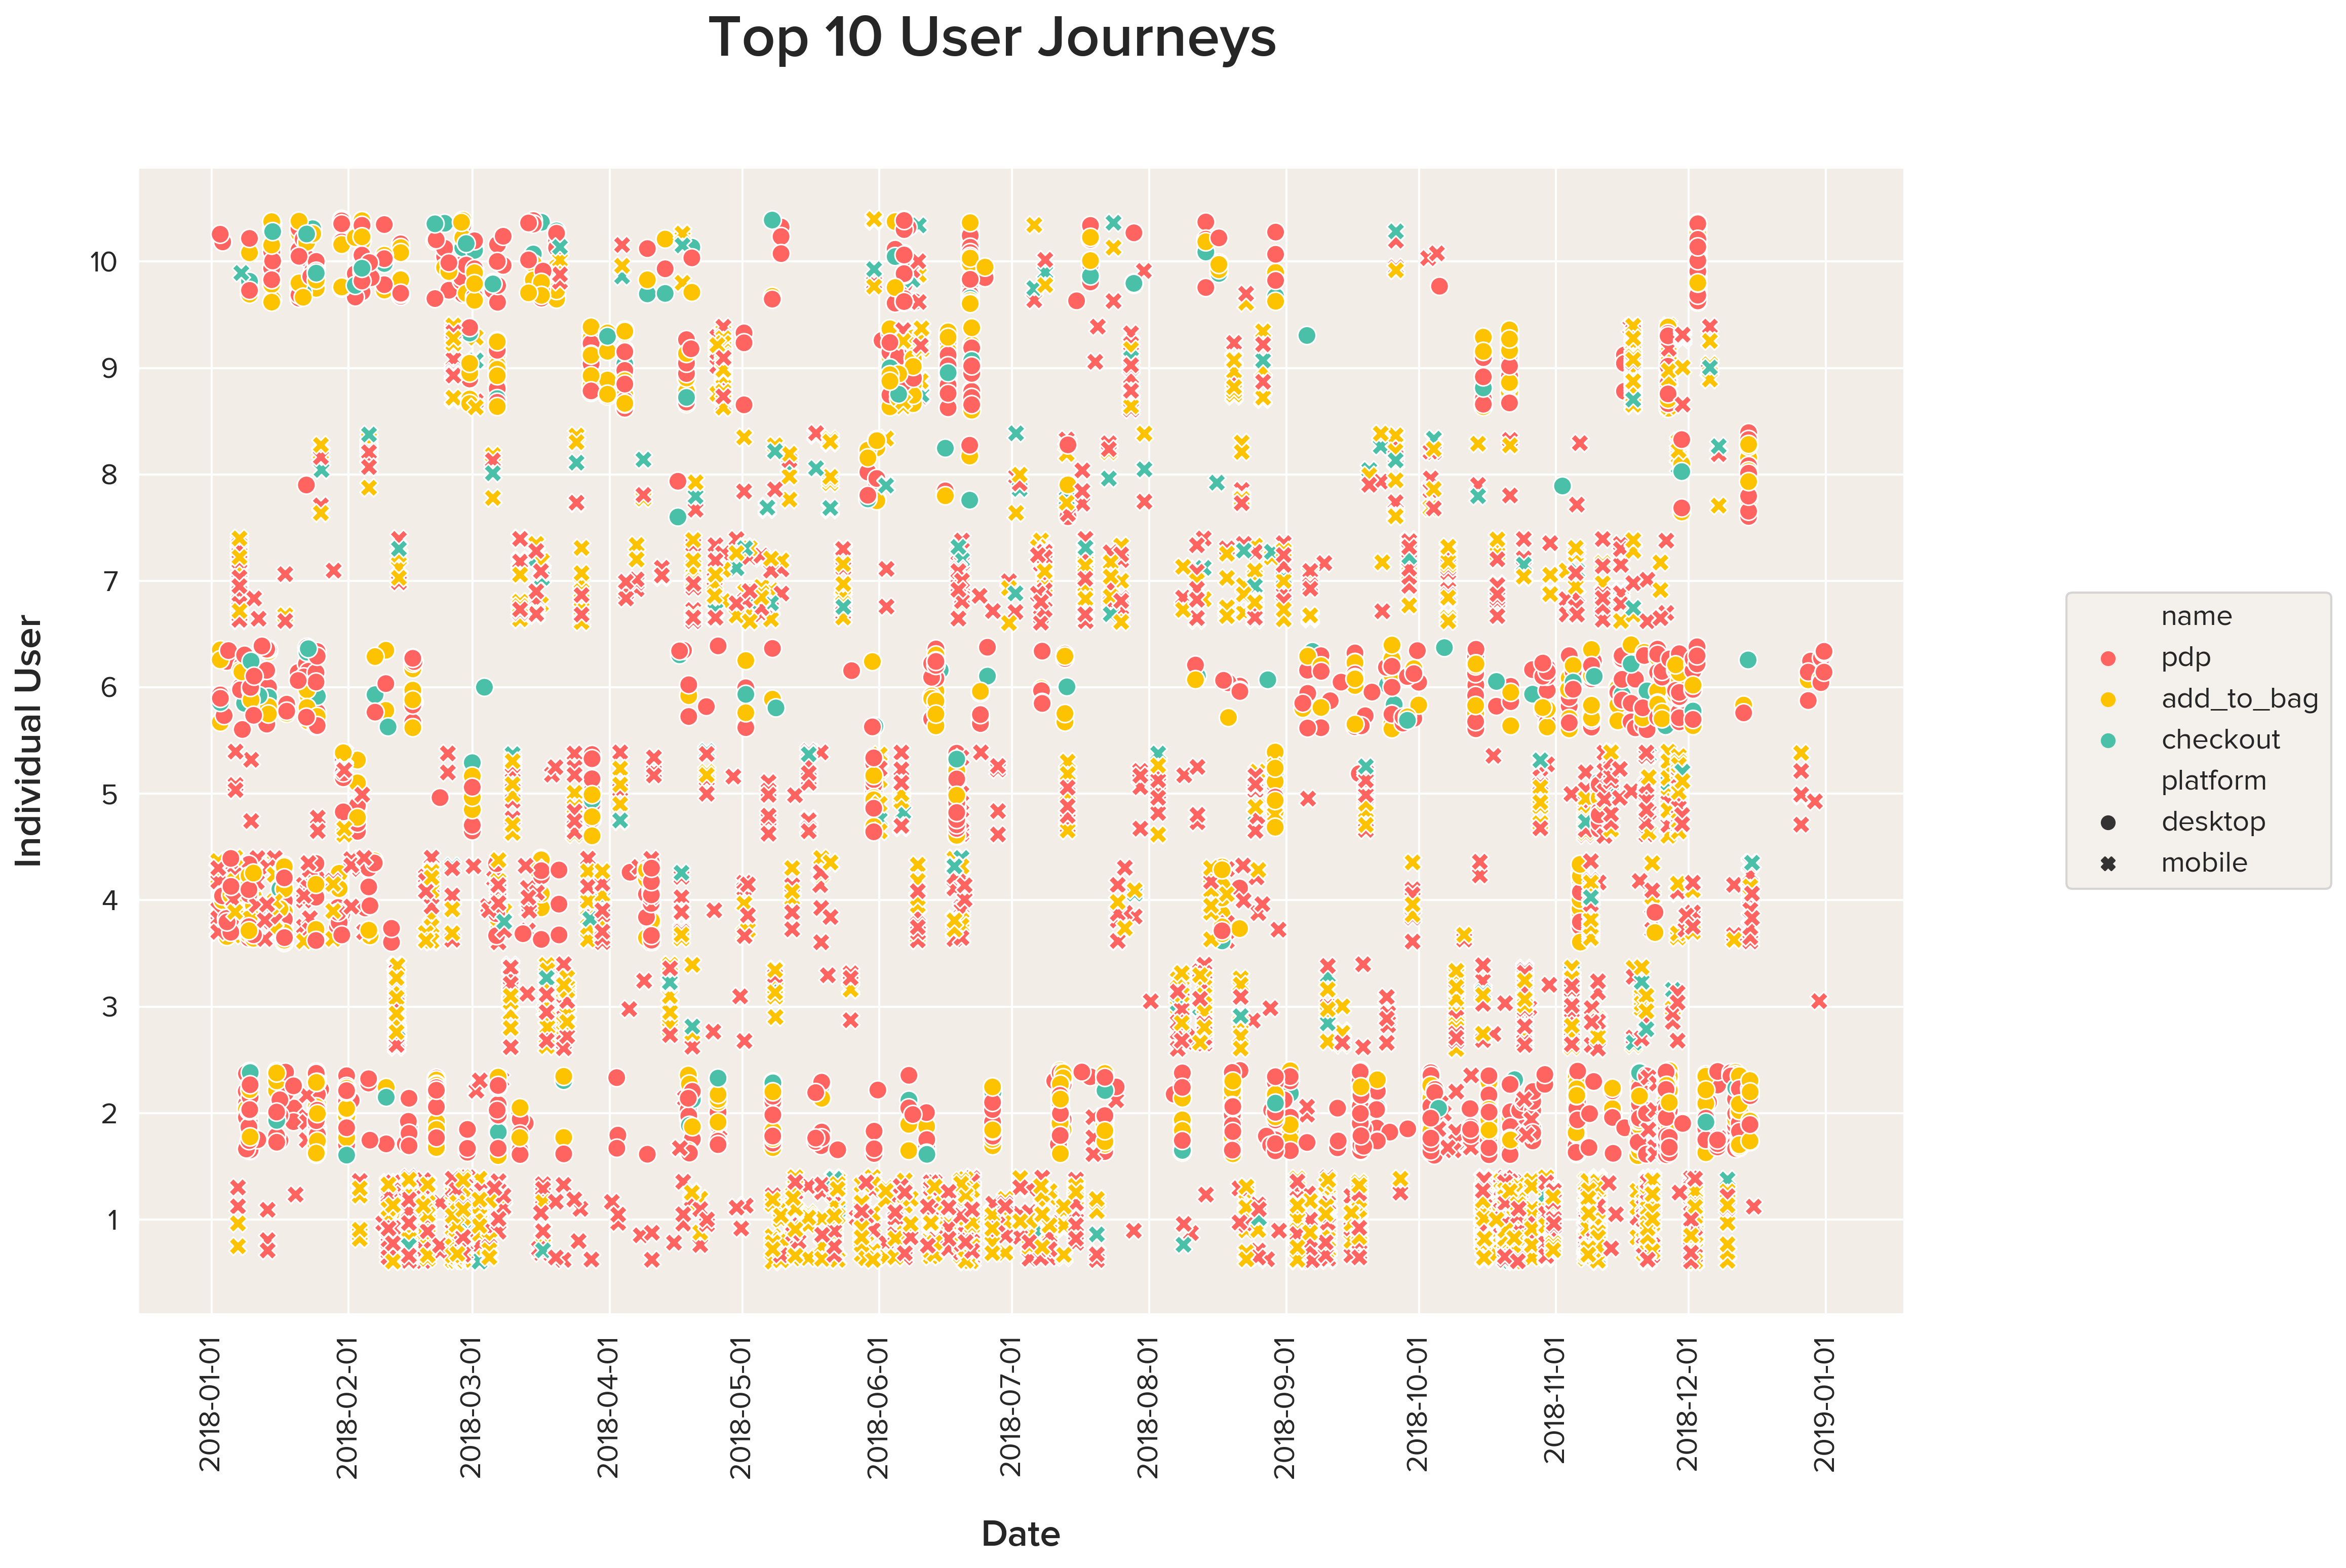

In [10]:
user_paths(
    users.sort_values("lifetime_orders", ascending=False).head(10),
    y_jitter=0.4,
    title="Top 10 User Journeys"
)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  after removing the cwd from sys.path.

  sql_to_df (/home/jovyan/lib/sql.py:16):
    14.183 seconds


  _rename_events (/home/jovyan/etl/events.py:32):
    0.006 seconds


  coerce_types (/home/jovyan/etl/gen

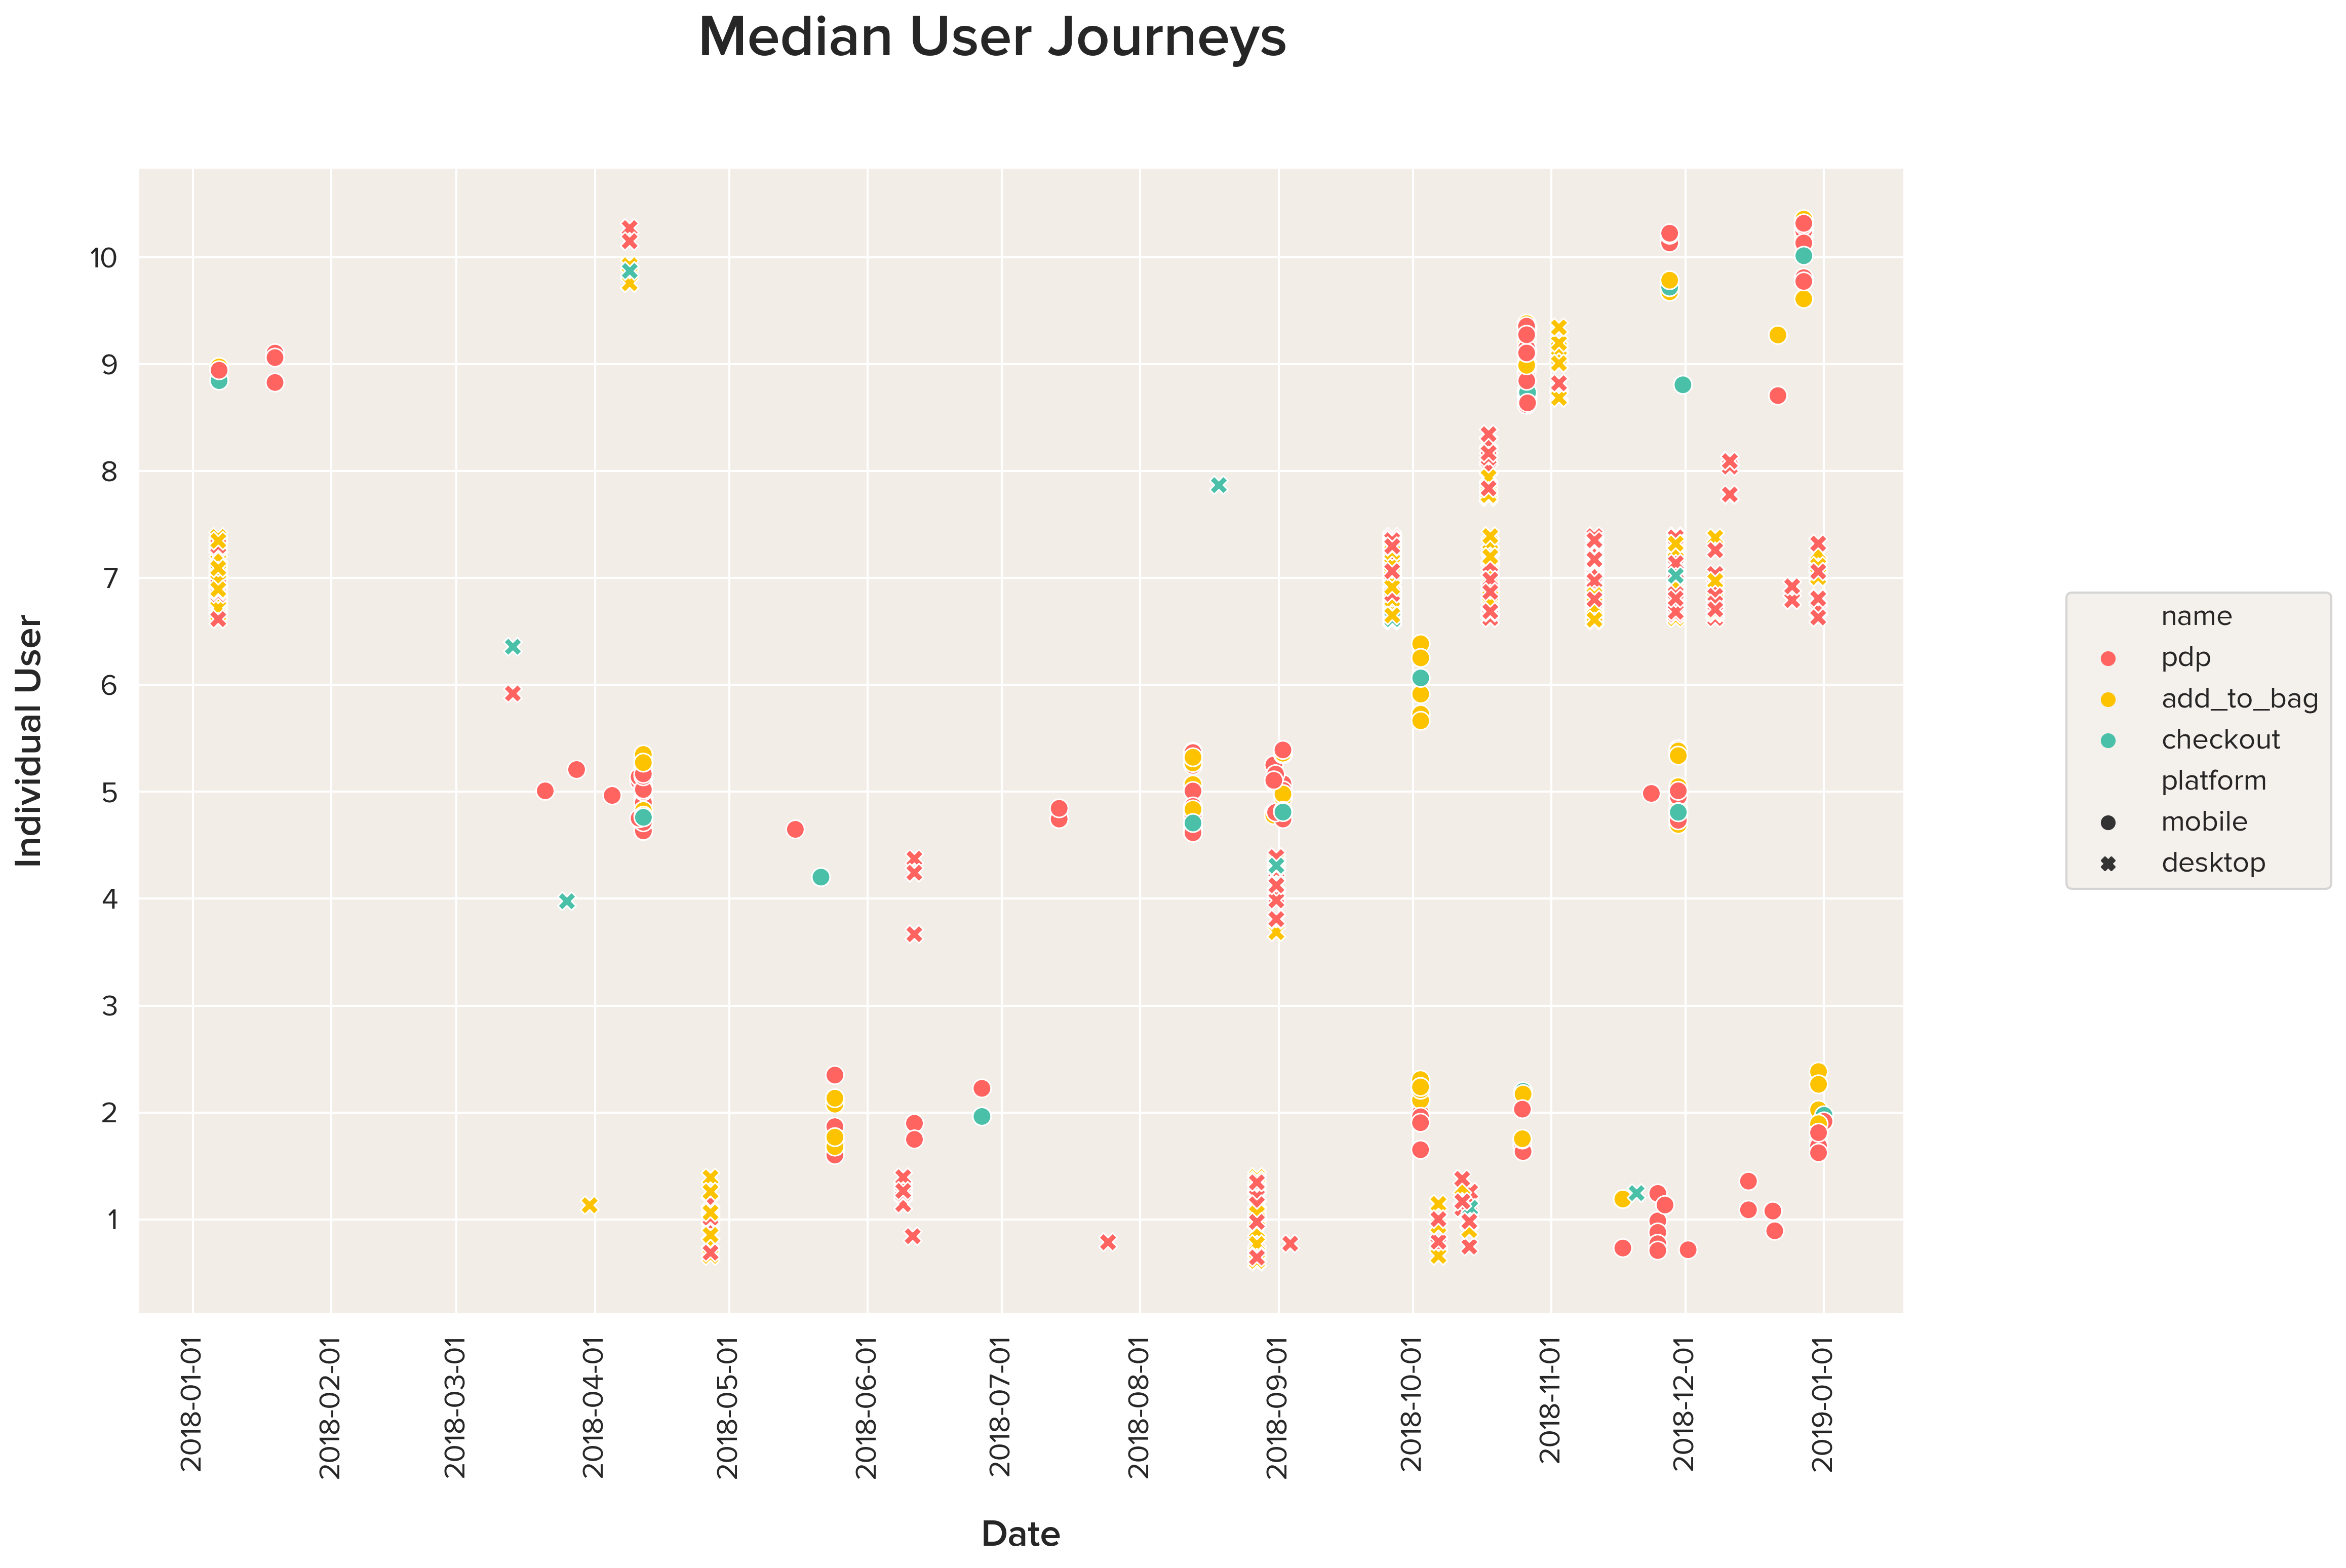

In [12]:
candidates = users[
    (users[UserColumns.LIFETIME_ORDERS] > 1) &
    (users[UserColumns.MIN_VISIT_TIME] < date(2018, 1, 1)) &
    (users[UserColumns.MAX_VISIT_TIME] > date(2019, 1, 1))
]
midpoint = math.floor(len(candidates) / 2)
events = user_paths(
    candidates.sort_values("lifetime_orders", ascending=False)[midpoint:midpoint+10],
    y_jitter=0.4,
    title="Median User Journeys"
)

### Sales and Emails

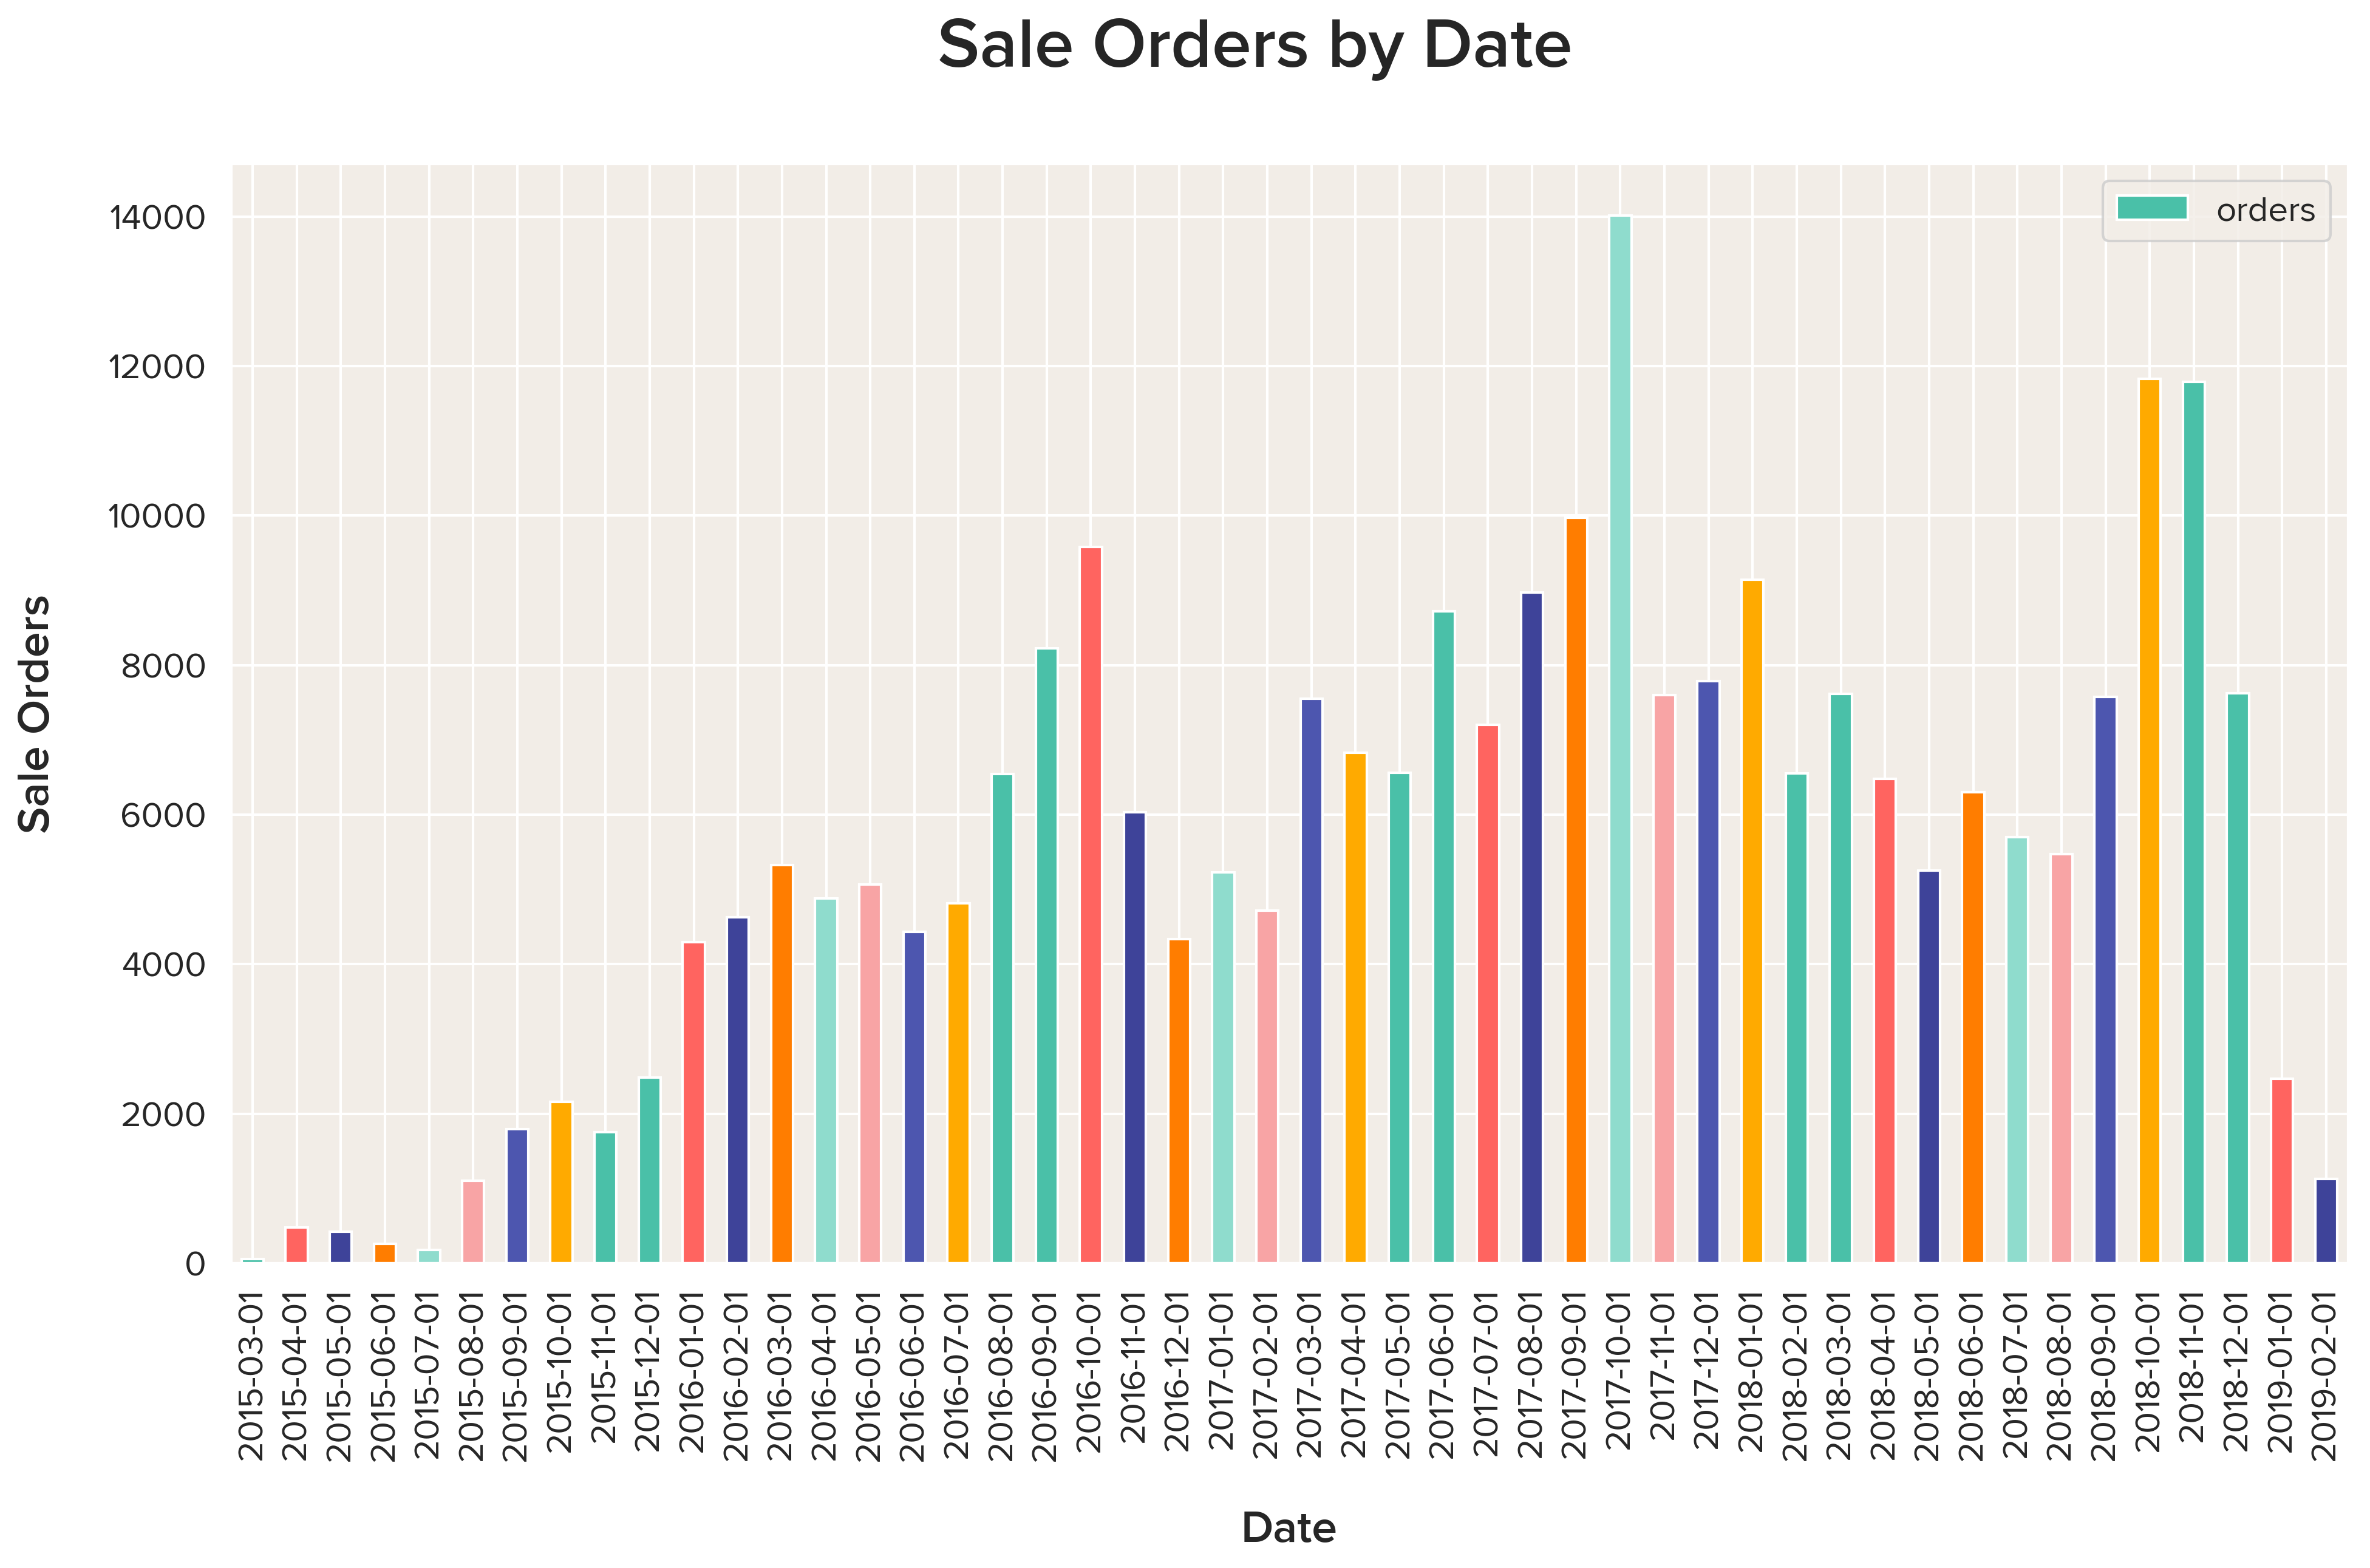

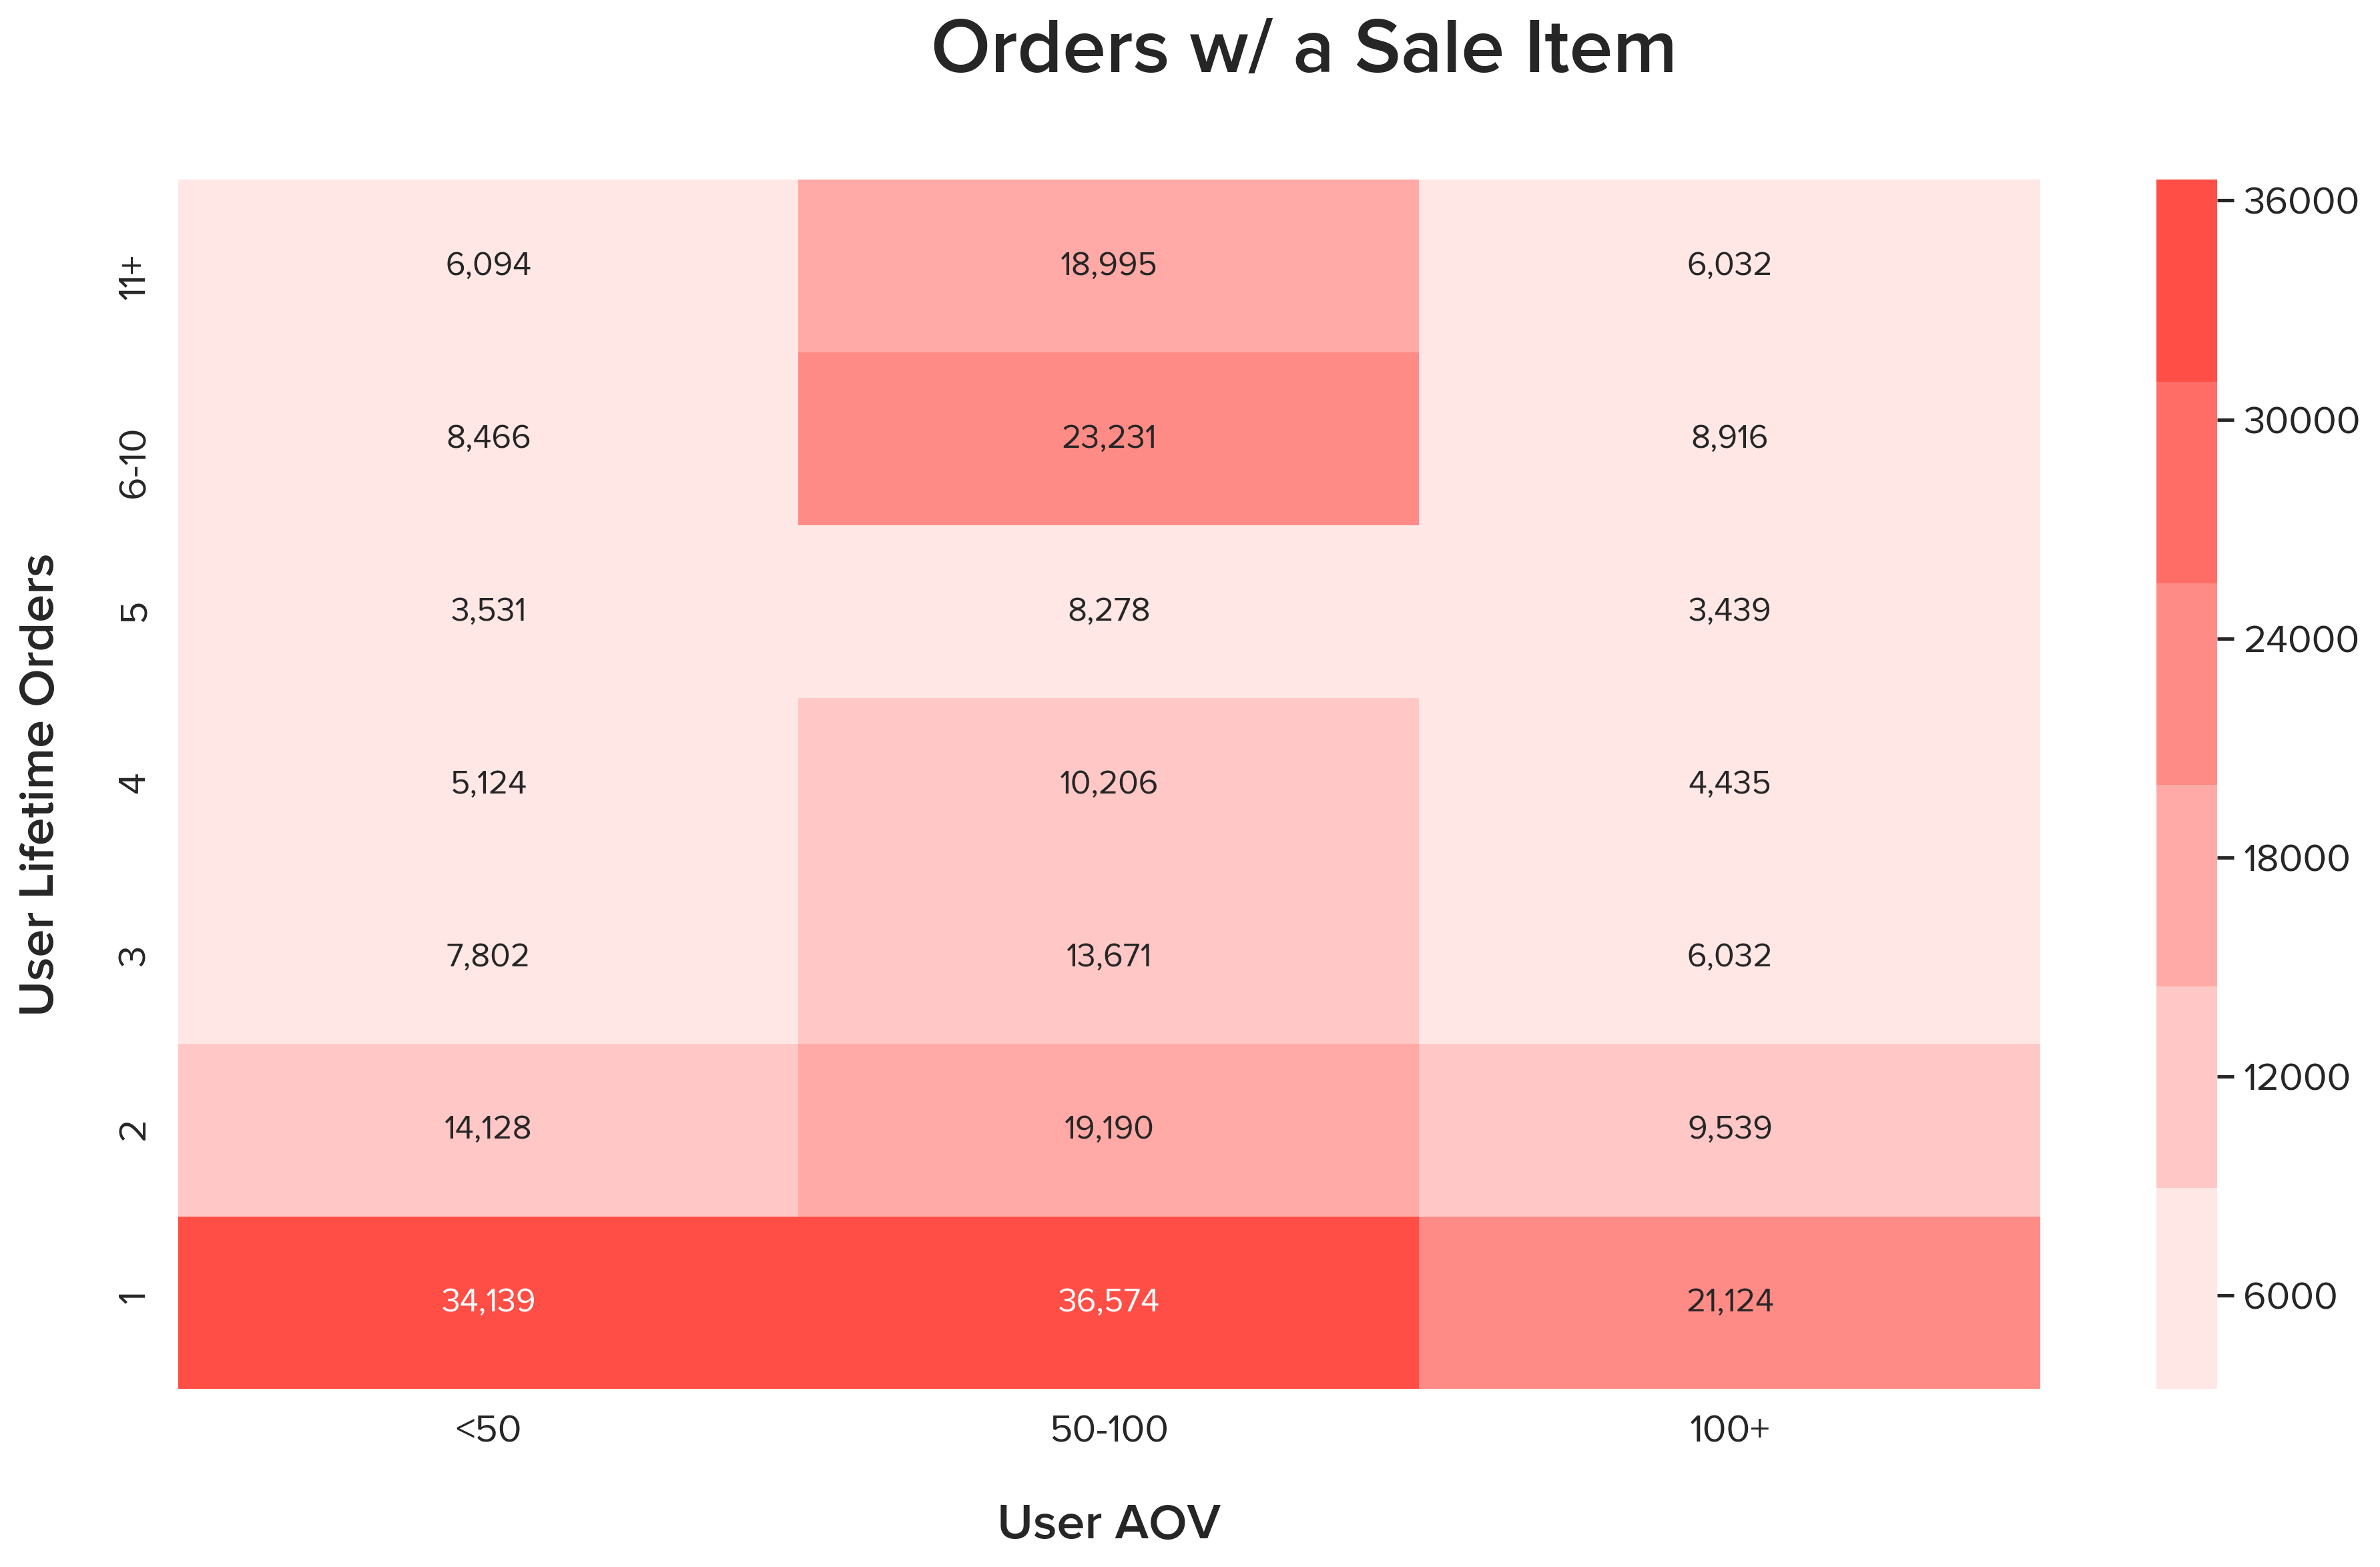

In [14]:
sales(transactions)

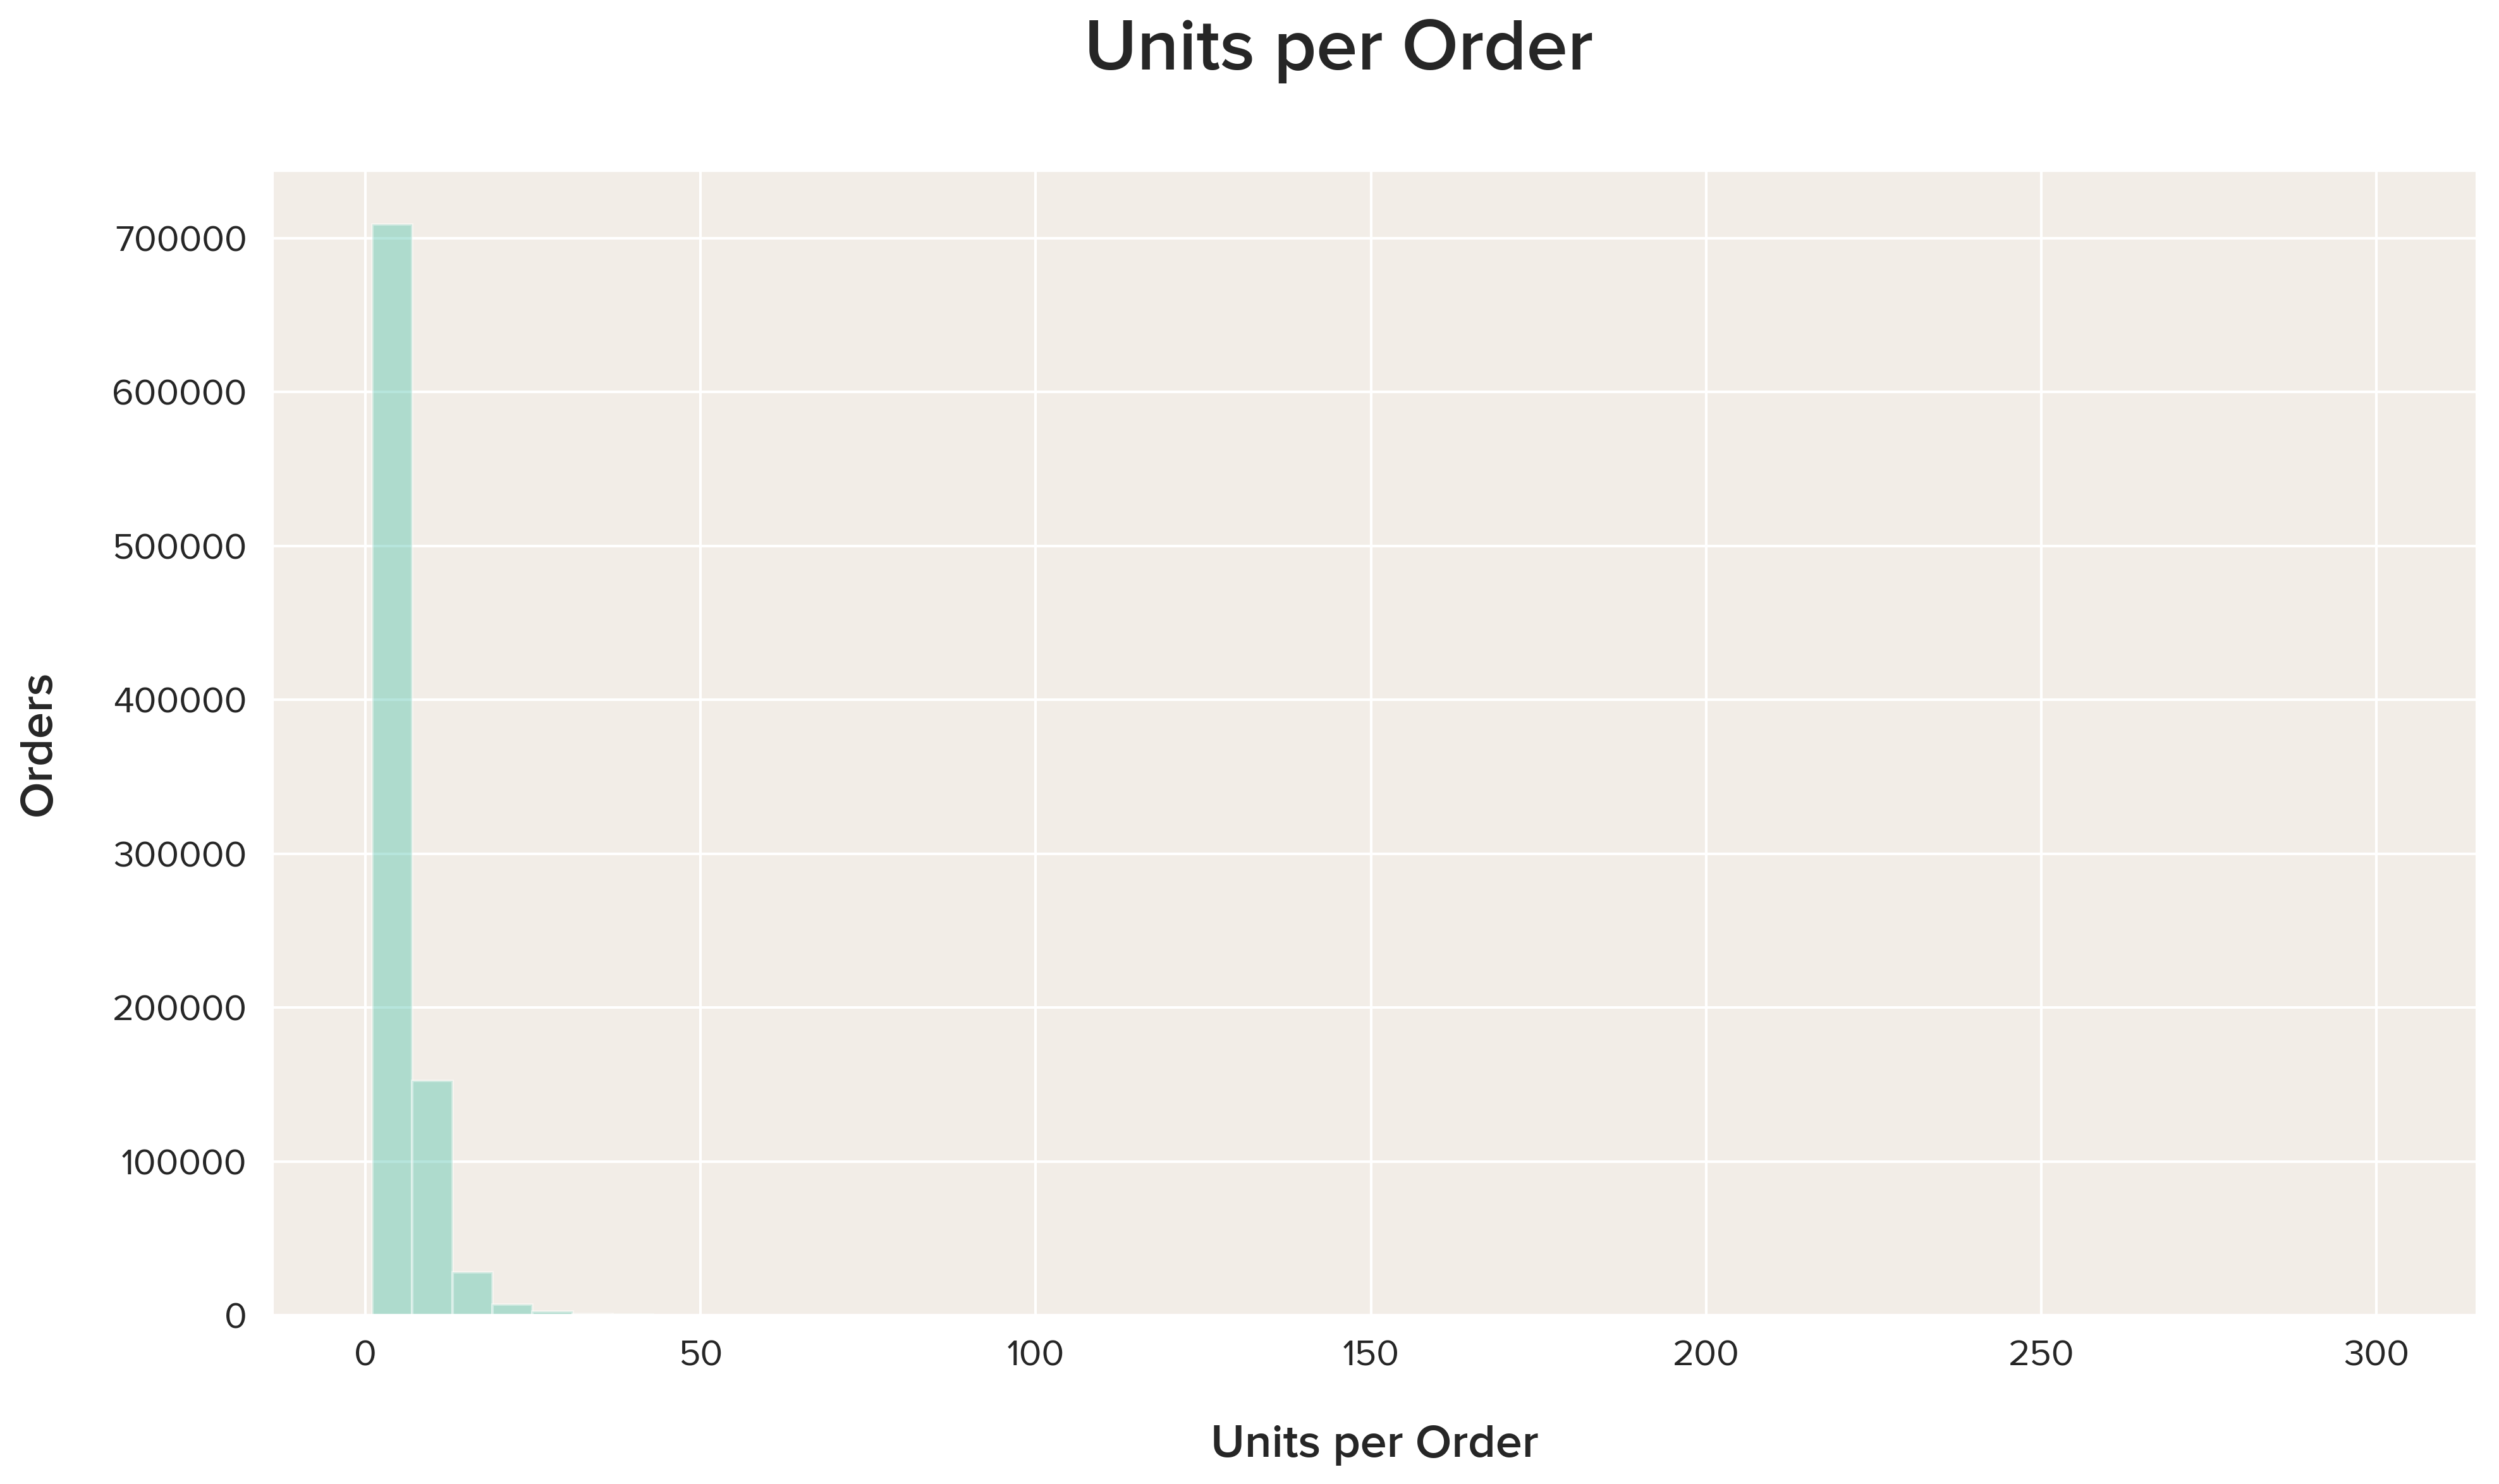

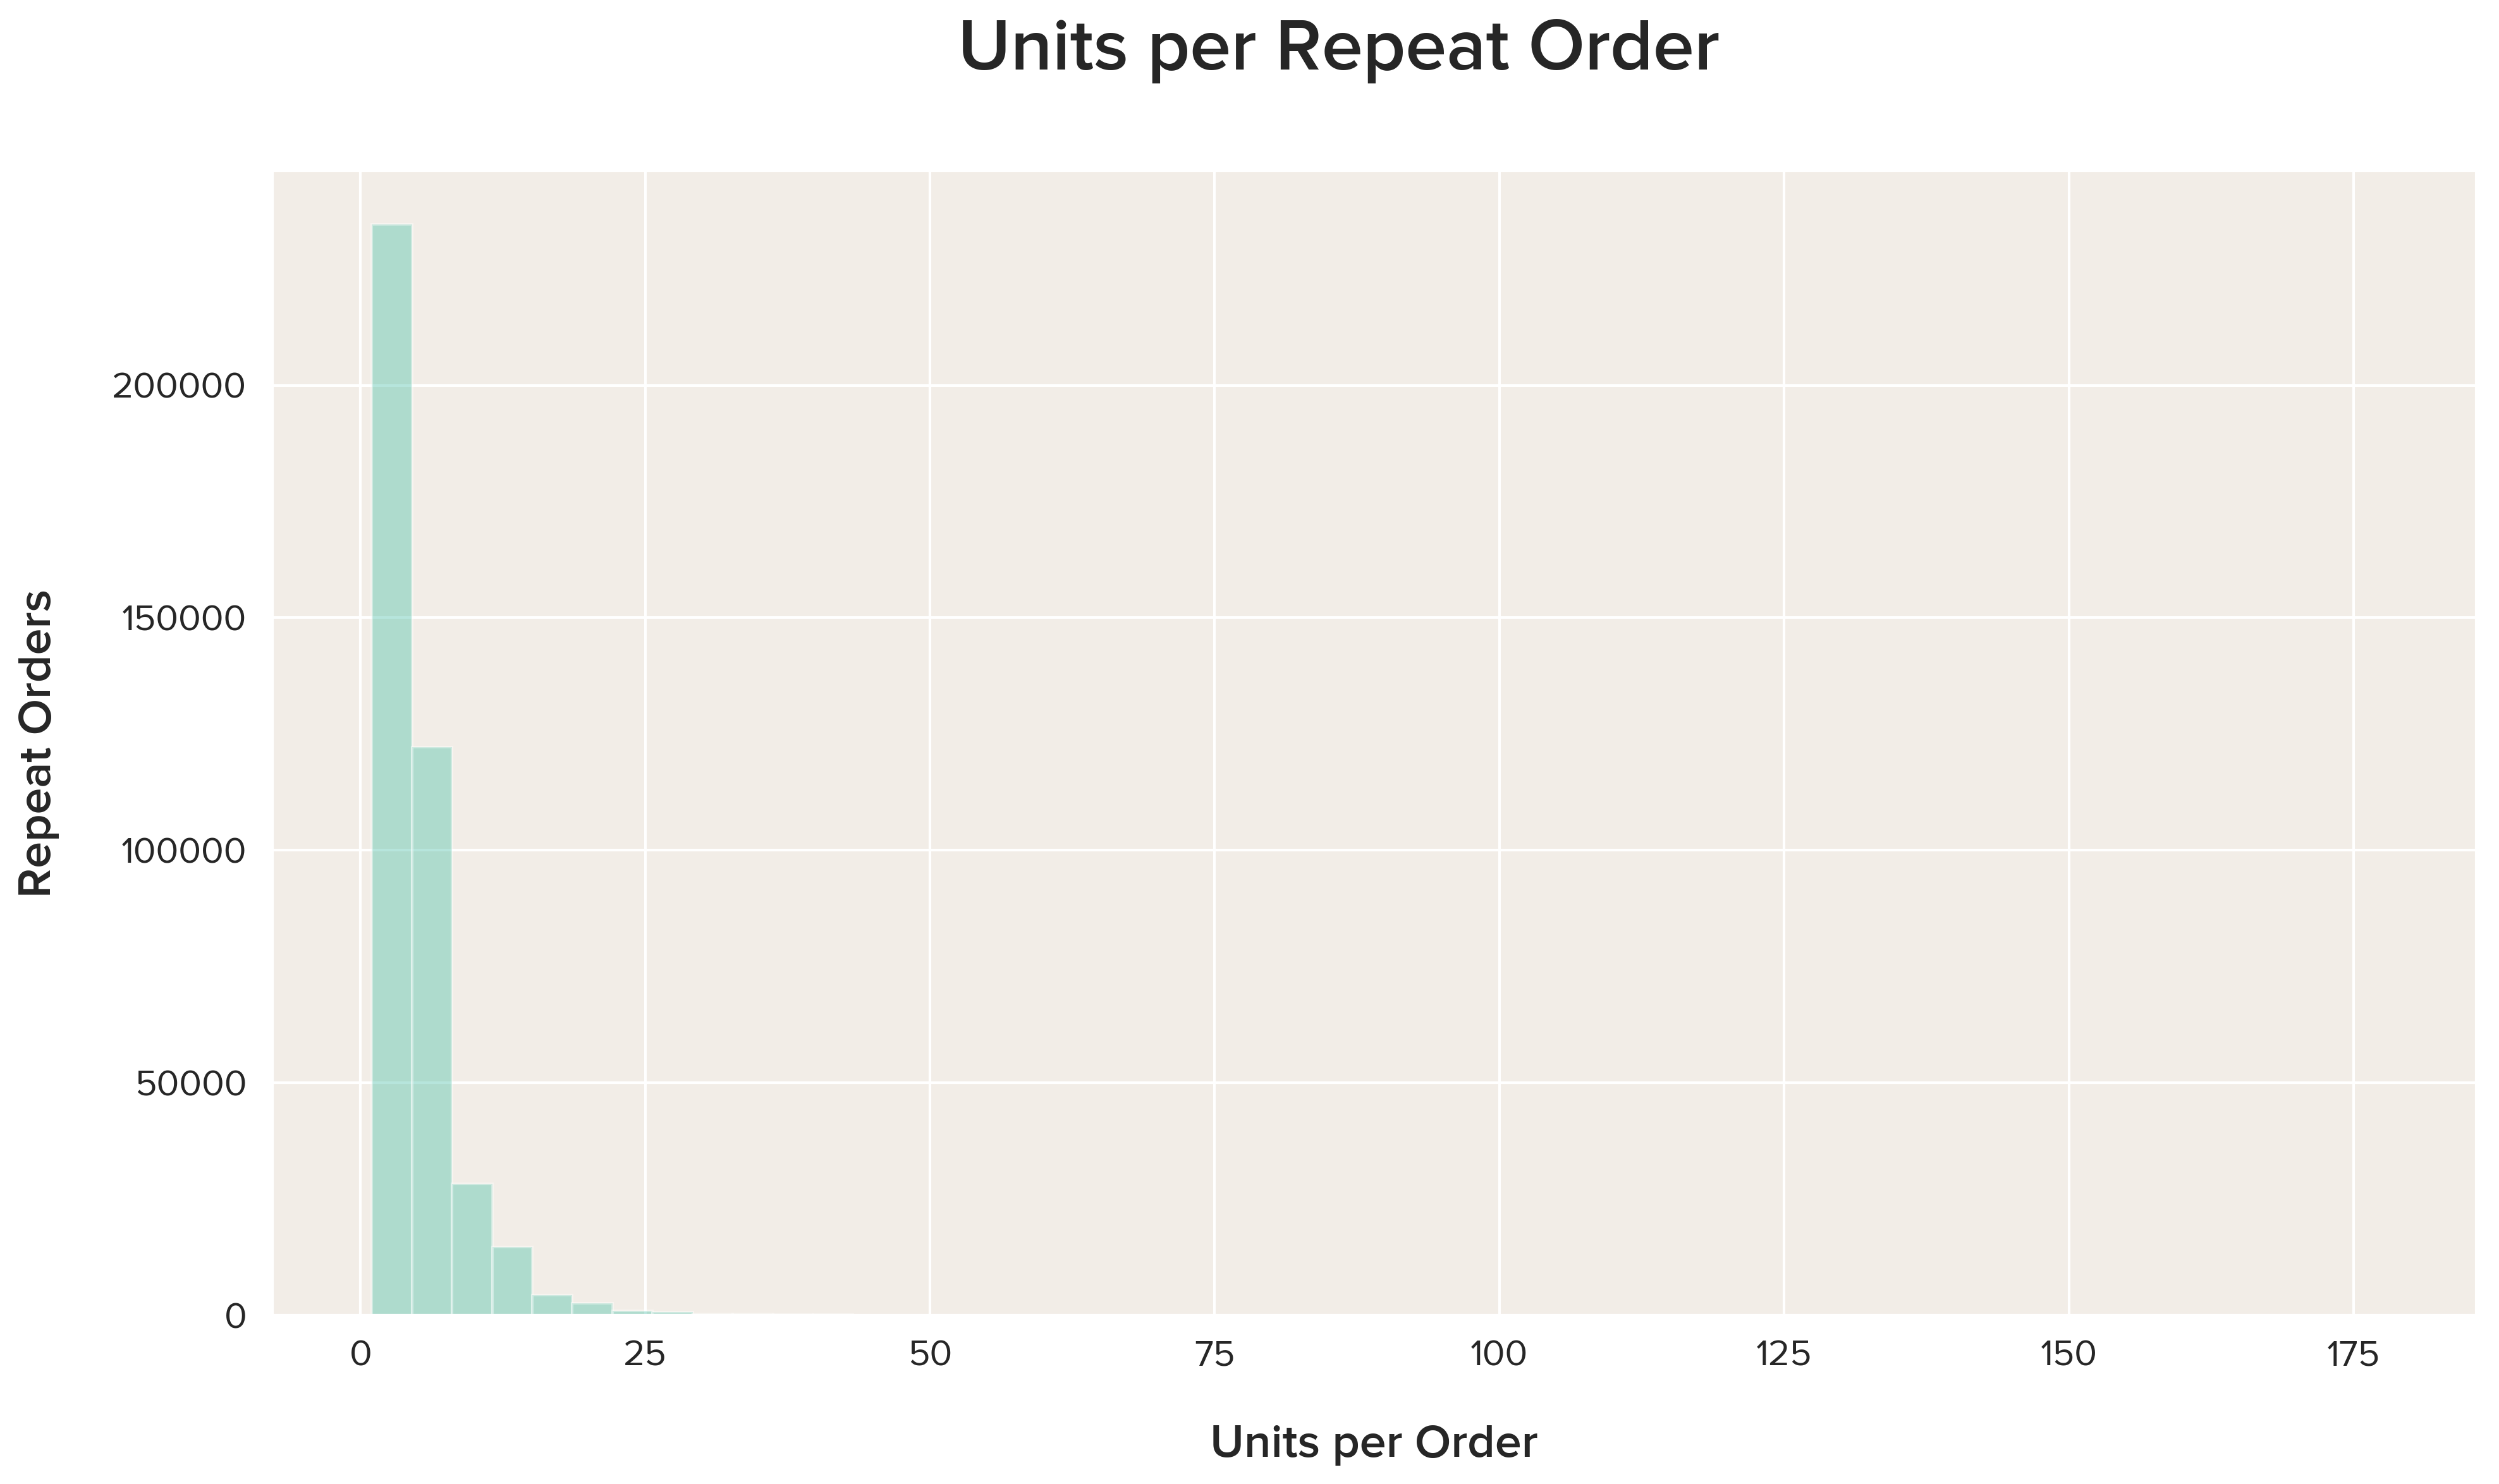

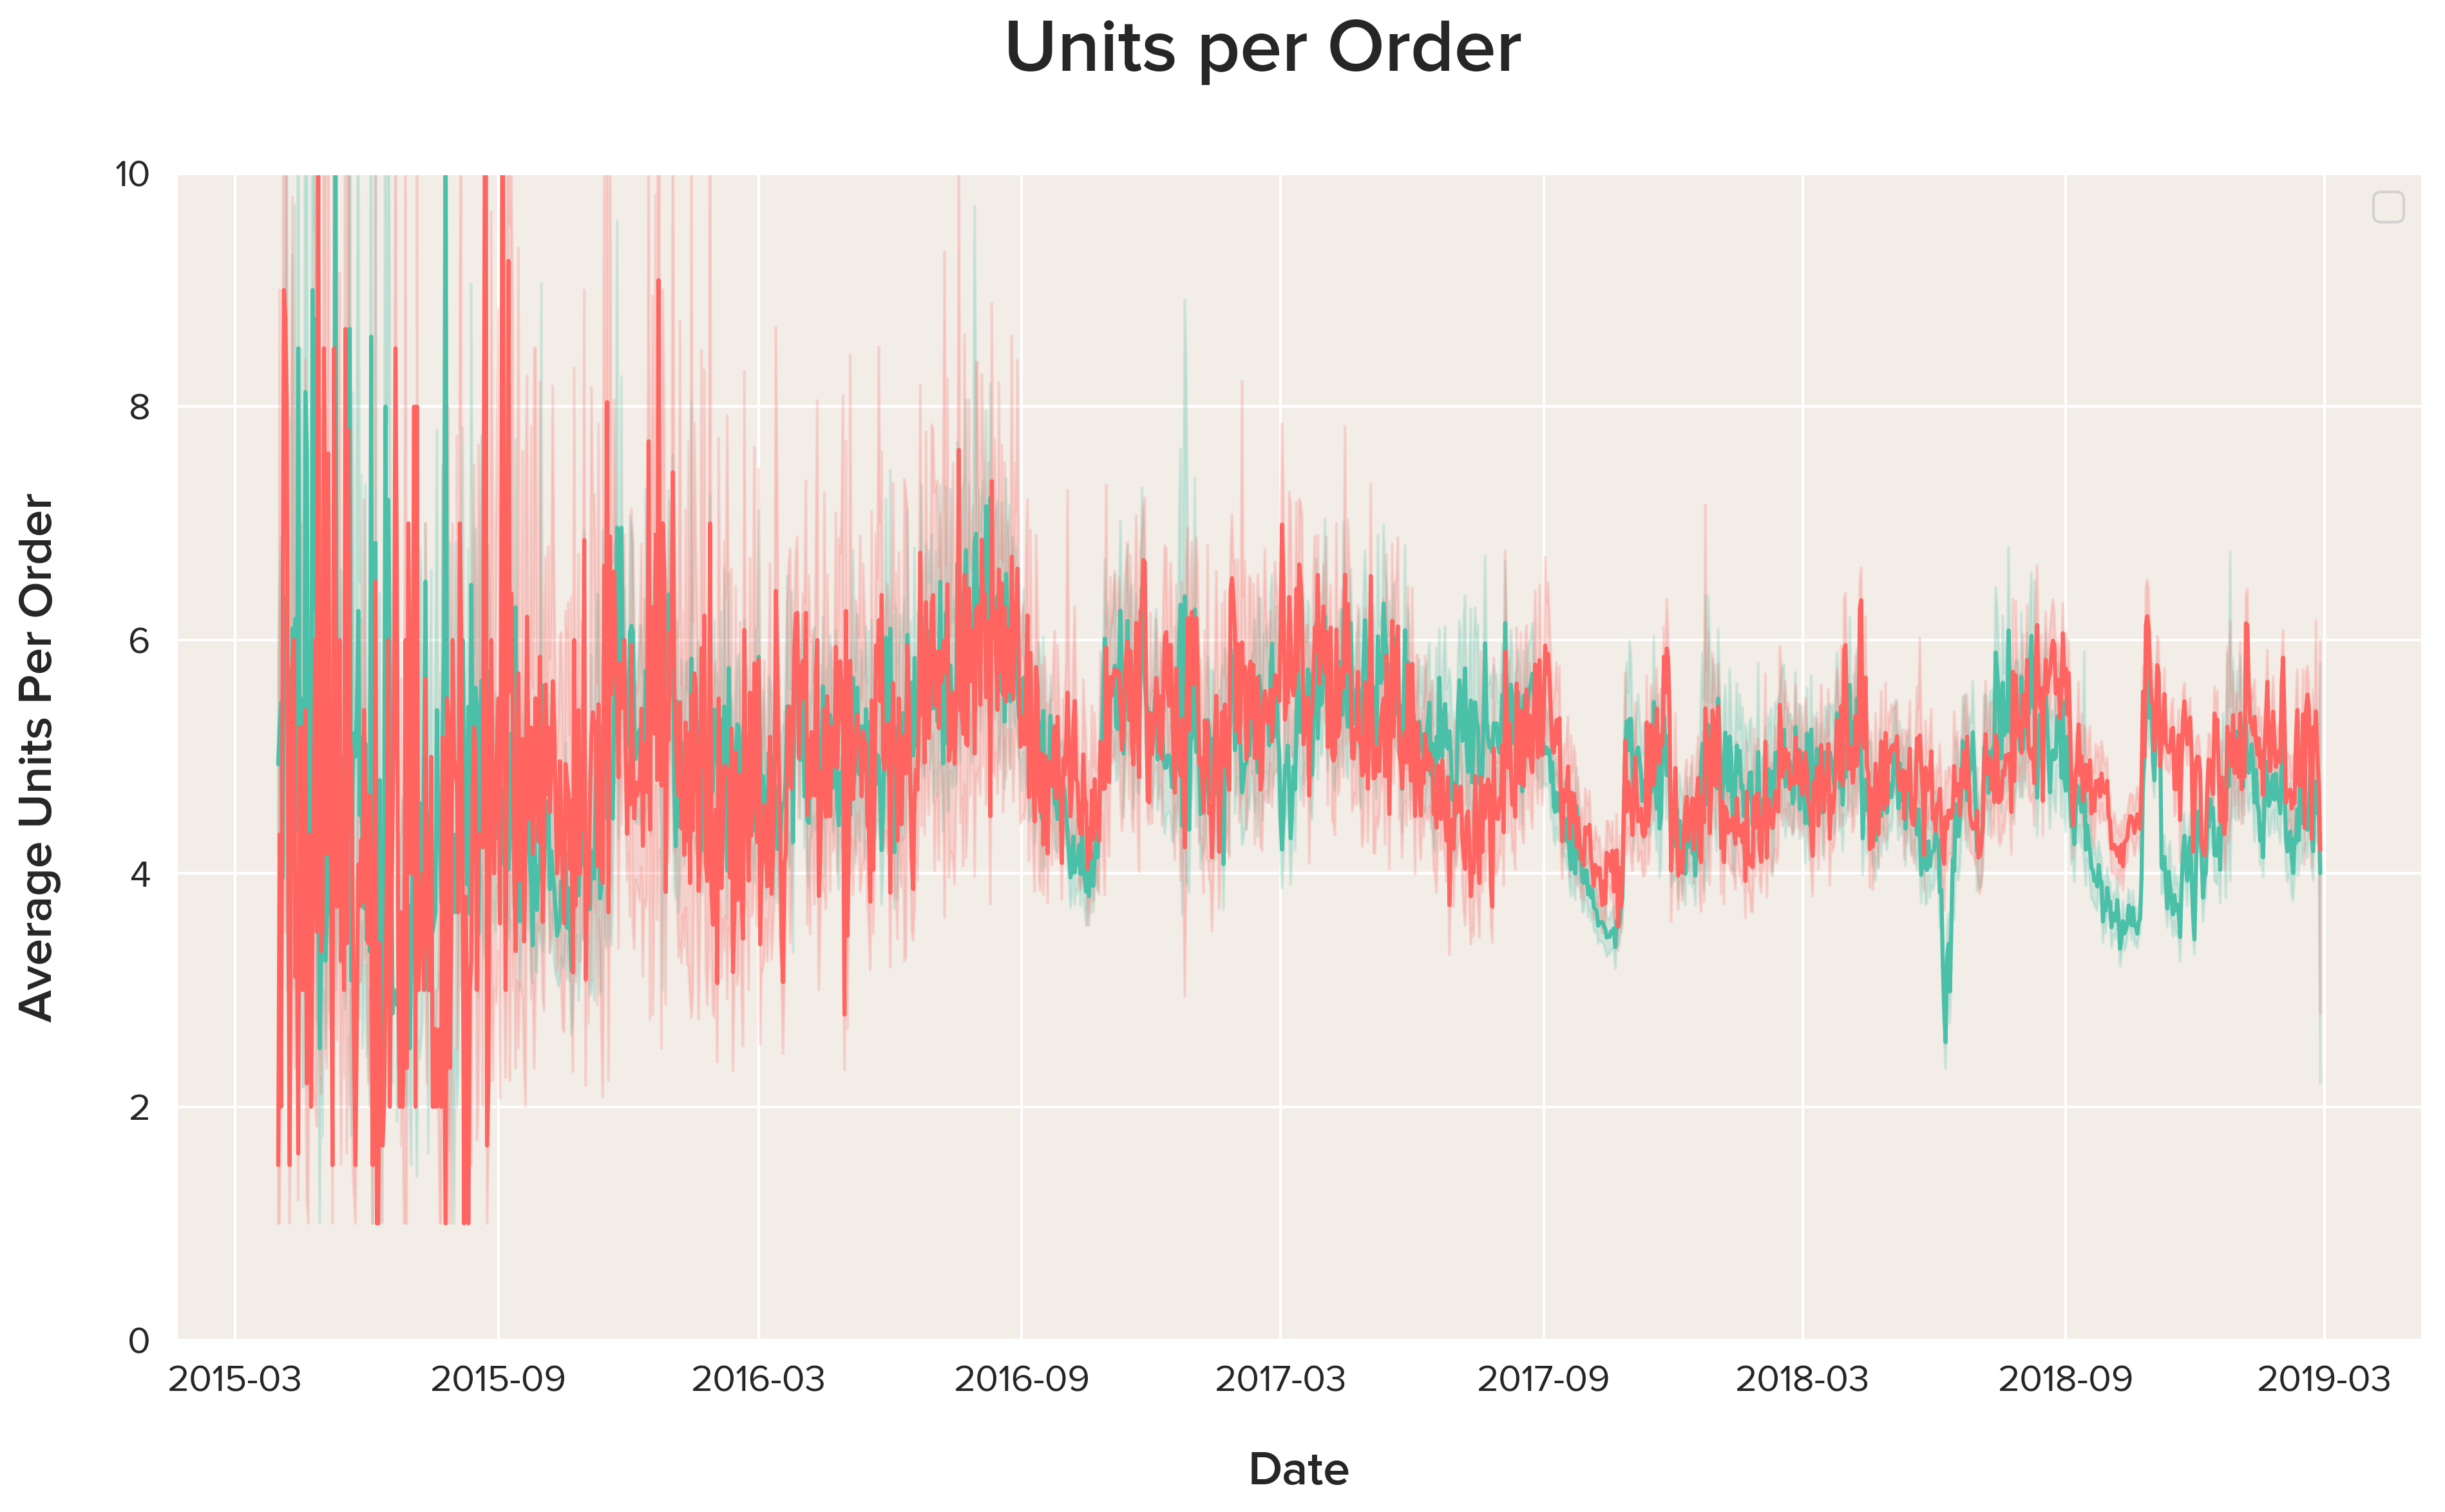

In [11]:
units_per_order(transactions)

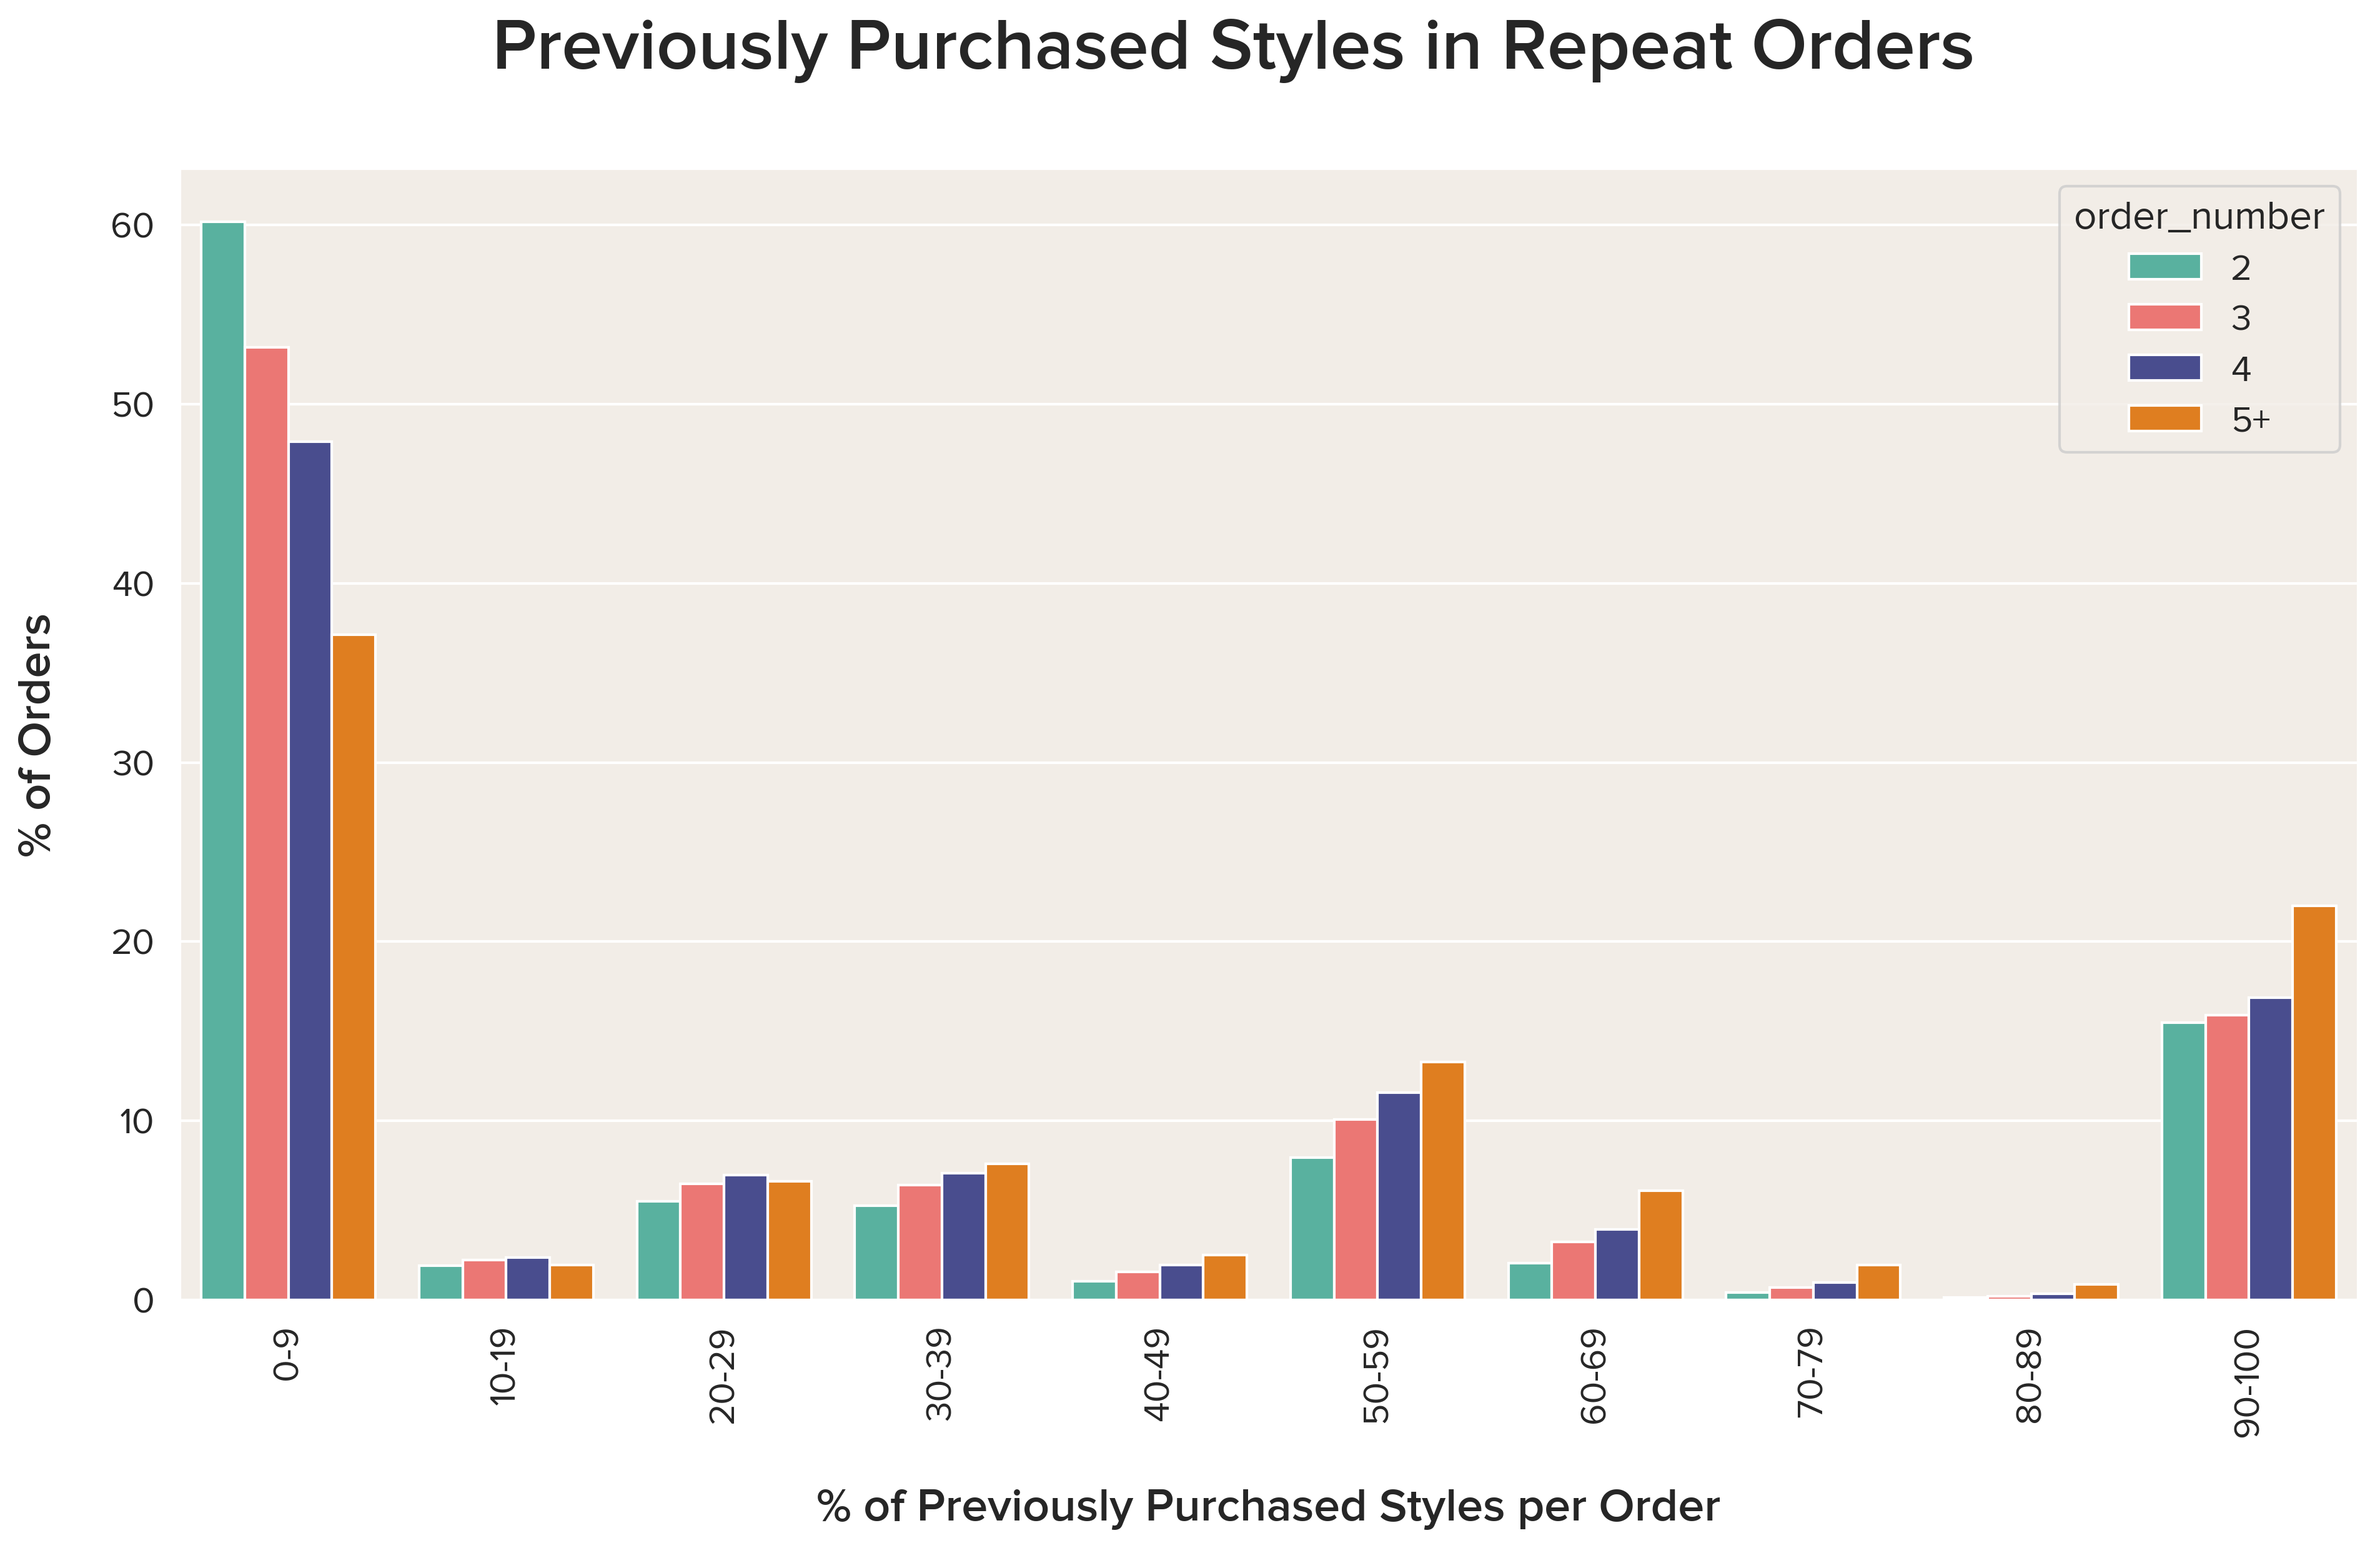

In [28]:
common_products(transactions)

In [26]:
list(range(0, 91, 10)) + [101]

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 101]

In [43]:
start = date(2019, 2, 15)
end = date(2019, 2, 25)
results = sql_to_df('views_per_bag.sql', start=start, end=end)
results.head()

distinct_id        day  product  \
0  168b6600b11803-060424df188b928-797f3265-3d10d-... 2019-02-16   7.0000   
1  168d2e737bcb59-0979affb02df9-797f3265-3d10d-16... 2019-02-16   2.0000   
2  166adf64428a9-0f2de08b7b26b9-3b15162d-410a0-16... 2019-02-16   4.0000   
3  15a59087c0917-0406de9c533982-6a11157a-15f900-1... 2019-02-16  17.0000   
4  166b8aa97cd5ed-0fc288874563d1-32046c01-4a574-1... 2019-02-16   1.0000   

      bag  bag_indicator  
0  3.0000              1  
1     nan              0  
2     nan              0  
3 18.0000              1  
4     nan              0


  sql_to_df (/home/jovyan/lib/sql.py:16):
    30.493 seconds



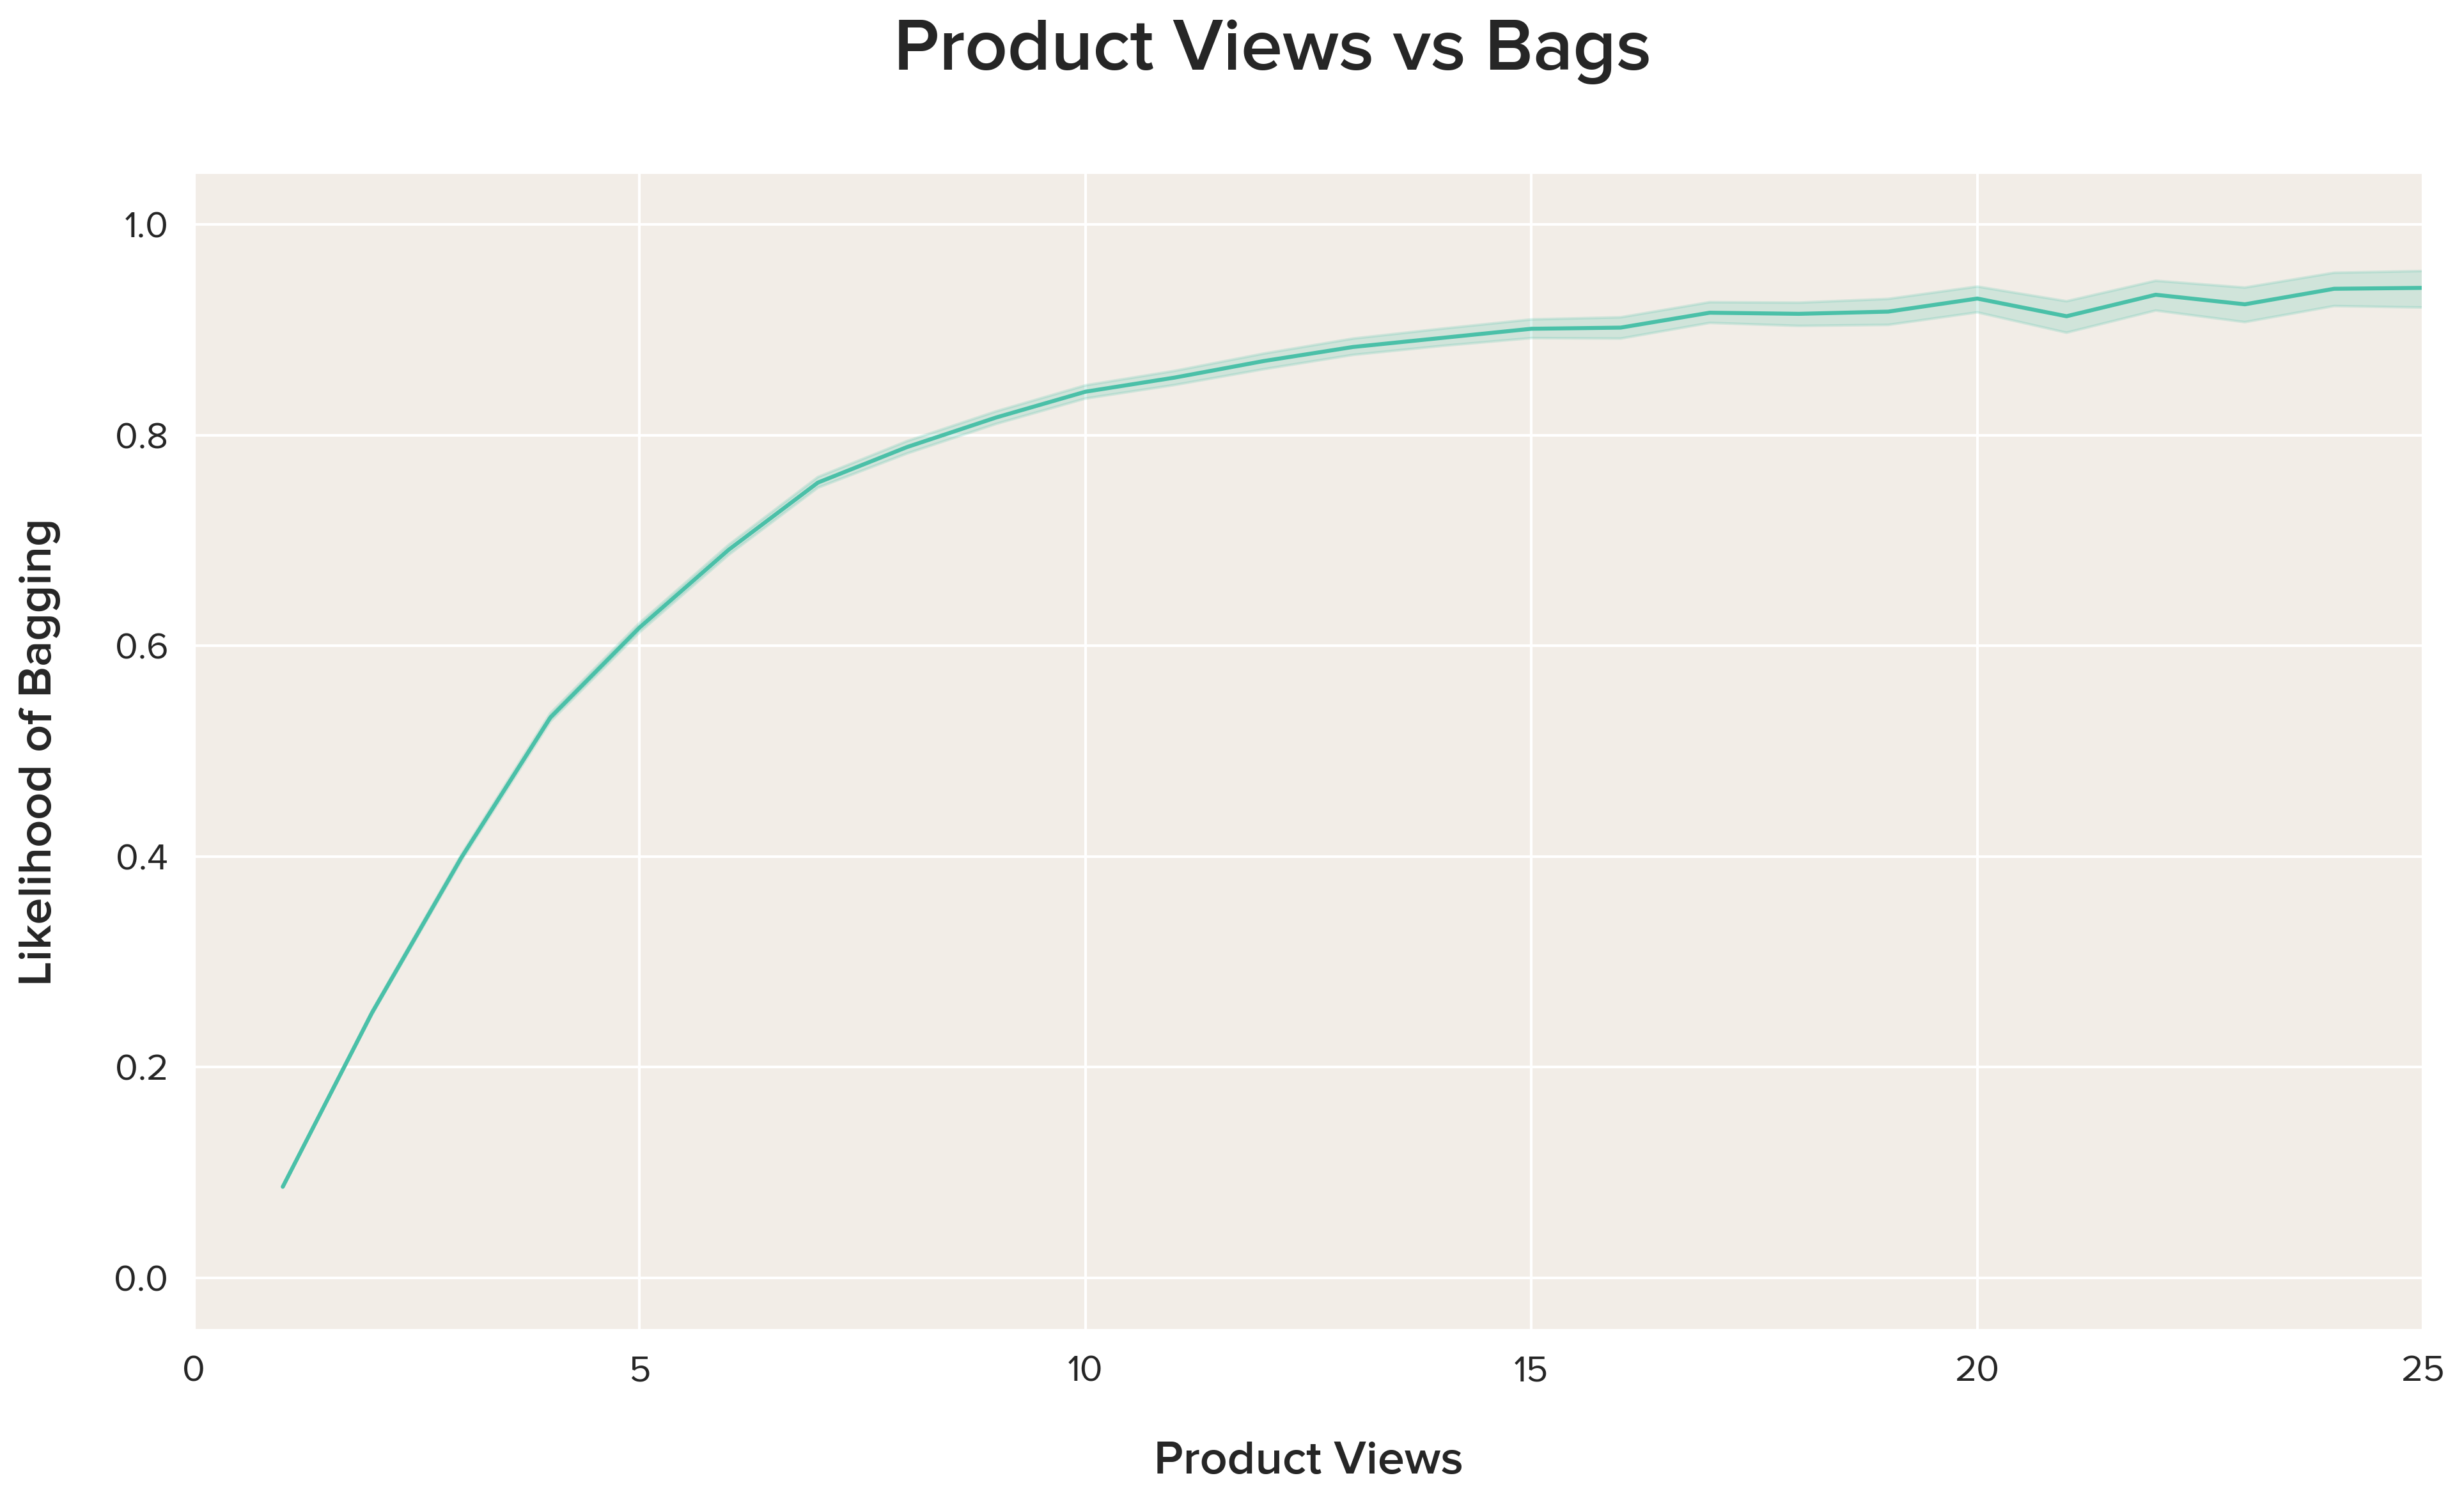

In [5]:
products_per_bag()